In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [0]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X,Y = mnist.data, mnist.target

In [0]:
mnist.data.shape

(70000, 784)

In [0]:
mnist.target.shape

(70000,)

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
X_reshaped = X[0].reshape(28,28)

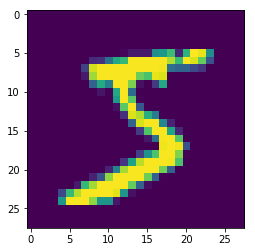

In [0]:
plt.imshow(X_reshaped,interpolation='nearest')

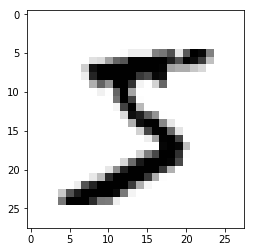

In [0]:
plt.imshow(X_reshaped,cmap=mpl.cm.binary)

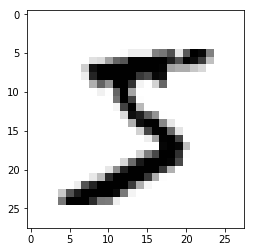

In [0]:
plt.imshow(X_reshaped,cmap=mpl.cm.binary,interpolation='nearest')

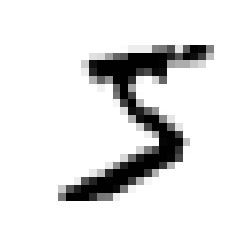

In [0]:
plt.imshow(X_reshaped,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [0]:
Y[0]

'5'

In [0]:
import numpy as np

In [0]:
Y = Y.astype(np.uint8)

In [0]:
Y[0]

5

In [0]:
X[0].shape

(784,)

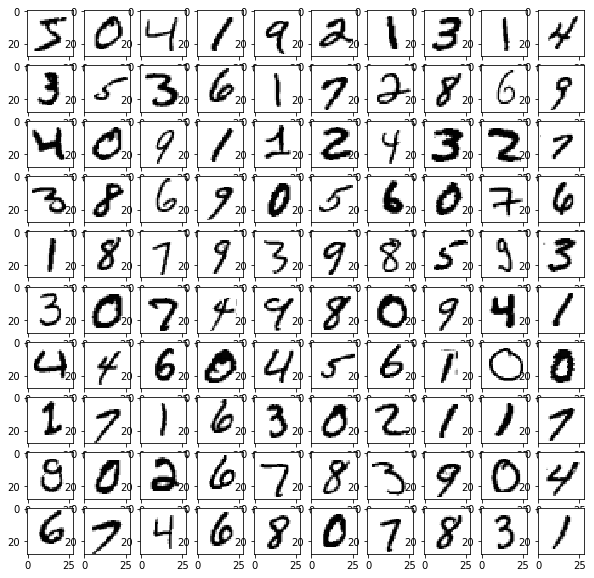

In [0]:
fig,ax = plt.subplots(nrows=10,ncols=10,figsize=(10,10))
for i in range(0,100):
  ax[int(i/10),i%10].imshow(X[i].reshape(28,28),cmap=mpl.cm.binary,interpolation='nearest')

In [0]:
X_train,Y_train,X_test,Y_test = X[:60000],Y[:60000],X[60000:],Y[60000:]

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
Y_train_5 = Y_train==5
Y_train_5

array([ True, False, False, ...,  True, False, False])

In [0]:
Y_test_5 = Y_test==5
Y_test_5

array([False, False, False, ..., False,  True, False])

In [0]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
#X_reshaped.shape
sgd_clf.predict([X[0]])
#X_reshaped

array([ True])

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)

In [0]:
for i,j in skfolds.split(X_train,Y_train_5):
  print('i : ',i)
  print('j : ',j)
  X_train_fold = X_train[i]
  X_test_fold = X_train[j]
  Y_train_fold = Y_train_5[i]
  Y_test_fold = Y_train_5[j]
  
  clf_clone = clone(sgd_clf)
  clf_clone.fit(X_train_fold,Y_train_fold)
  n_correct = sum(clf_clone.predict(X_test_fold)==Y_test_fold)
  print(n_correct/len(Y_test_fold))

i :  [19964 19965 19966 ... 59997 59998 59999]
j :  [    0     1     2 ... 20331 20342 20359]
0.95035
i :  [    0     1     2 ... 59997 59998 59999]
j :  [19964 19965 19966 ... 40088 40125 40127]
0.96035
i :  [    0     1     2 ... 40088 40125 40127]
j :  [39988 39989 39990 ... 59997 59998 59999]
0.9604


In [0]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(sgd_clf,X_train,Y_train_5,cv=3,scoring='accuracy')

In [0]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)
 

In [0]:
never5 = Never5Classifier()
cross_val_score(never5,X_train,Y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [0]:
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(sgd_clf,X_train,Y_train_5,cv=3)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_5,Y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

![alt text](https://ask.qcloudimg.com/http-save/yehe-1008345/mqgkgxt8yc.jpeg?imageView2/2/w/1620)

In [0]:
confusion_matrix(Y_train_5,Y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [0]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(Y_train_5,Y_train_pred))
print(Y_train_pred)
print(recall_score(Y_train_5,Y_train_pred))

0.8370879772350012
[ True False False ...  True False False]
0.6511713705958311


In [0]:
from sklearn.metrics import f1_score
f1_score(Y_train_5,Y_train_pred)

0.7325171197343846

In [0]:
Y_scores = sgd_clf.decision_function([X[0] ])
Y_scores

array([2164.22030239])

In [0]:
Y_scores = cross_val_predict(sgd_clf,X_train,Y_train_5,cv=3,method='decision_function')

In [0]:
Y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [0]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(Y_train_5,Y_scores)
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)
print(precisions)
print(recalls)
print(thresholds)

(59967,)
(59967,)
(59966,)
[0.09040123 0.09038606 0.09038757 ... 1.         1.         1.        ]
[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
[-106527.45300471 -105763.22240074 -105406.2965229  ...   38871.26391927
   42216.05562787   49441.43765905]


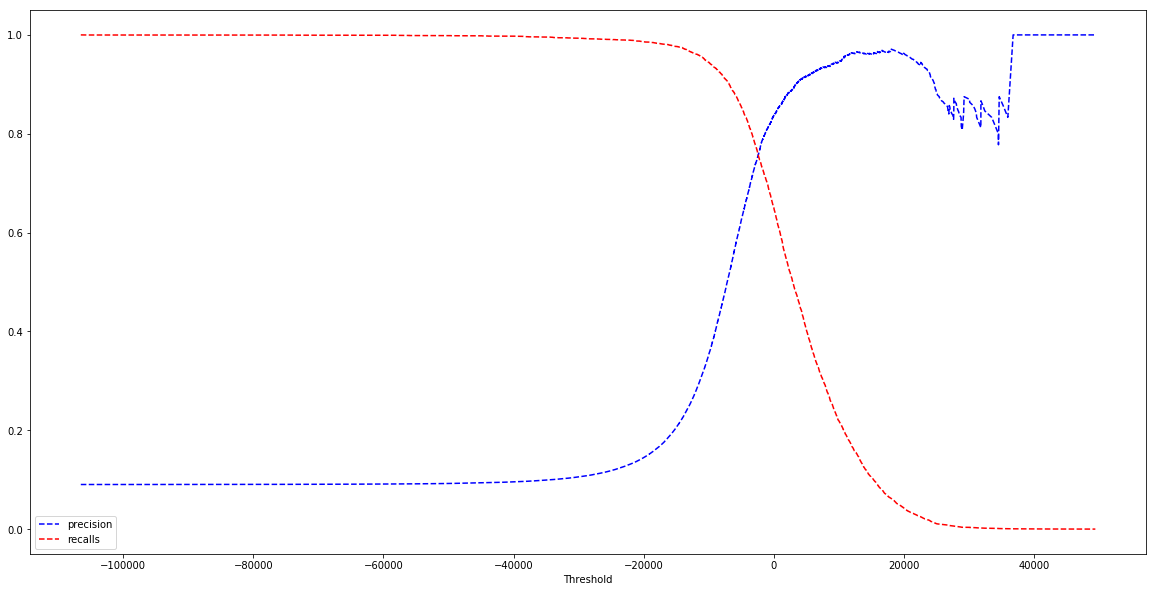

In [0]:
def precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.figure(figsize=(20,10))
  plt.plot(thresholds,precisions[:-1],'b--',label='precision')
  plt.plot(thresholds,recalls[:-1],'r--',label='recalls')  
  plt.xlabel('Threshold')
  plt.legend()
  plt.show()
precision_recall_vs_threshold(precisions,recalls,thresholds)

In [0]:
print(precision_score(Y_train_5,Y_scores>=thresholds[np.argmax(precisions>=0.9)]))
print(recall_score(Y_train_5,Y_scores>=thresholds[np.argmax(precisions>=0.9)]))

0.9000345901072293
0.4799852425751706


In [0]:
print(precision_score(Y_train_5,Y_scores>=thresholds[np.argmax(recalls<=0.9)]))
print(recall_score(Y_train_5,Y_scores>=thresholds[np.argmax(recalls<=0.9)]))

0.5160266582037448
0.8998339789706696


In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds_roc = roc_curve(Y_train_5,Y_scores)

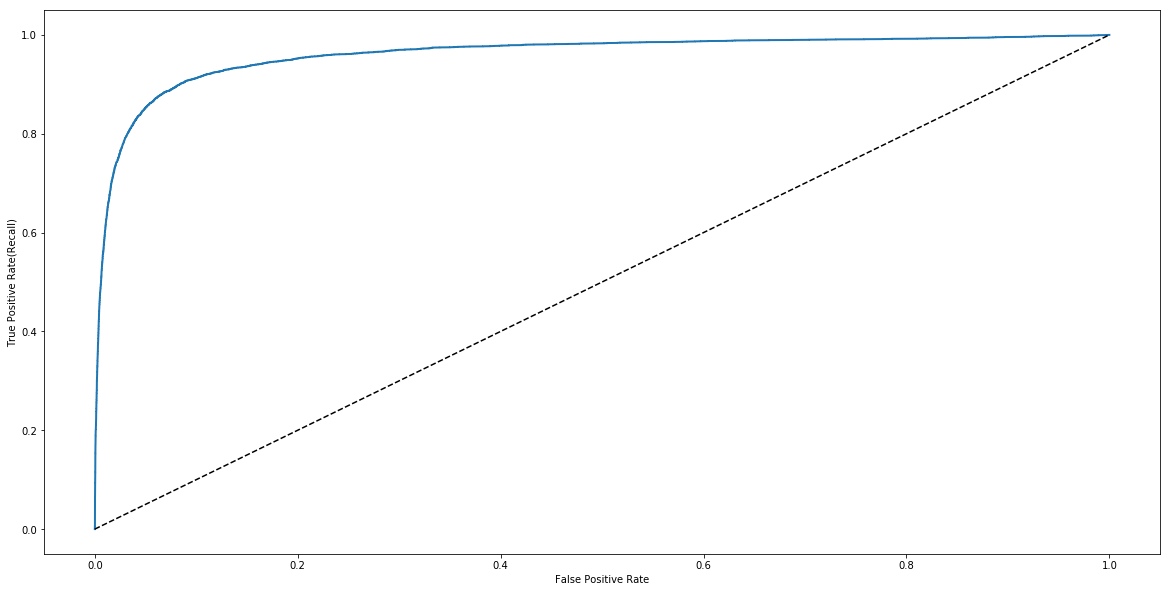

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate(Recall)')
  
plt.figure(figsize=(20,10))
plot_roc_curve(fpr, tpr)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJIAAAJQCAYAAADVHU6aAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xd4VGXexvH7zEx6JSG0UEMHQcCI%0AriIiYsFXXVDs3bUhuC5YEJZV3wWxYV1plrWiyCurq2tBFxUsK0pfikiXEgiBhPRMOc/7R5IhgQBB%0ASE4m+X6u5eLMmTOTO6Csc/N7nmMZYwQAAAAAAAAcicvpAAAAAAAAAAgNFEkAAAAAAACoFookAAAA%0AAAAAVAtFEgAAAAAAAKqFIgkAAAAAAADVQpEEAAAAAACAaqFIAgAAAAAAQLVQJAEAAAAAAKBaKJIA%0AAAAAAABQLR6nAxytxo0bm7Zt2zodAwAAAAAAoN5YvHhxljEm5UjXhVyR1LZtWy1atMjpGAAAAAAA%0AAPWGZVlbqnMdS9sAAAAAAABQLRRJAAAAAAAAqBaKJAAAAAAAAFQLRRIAAAAAAACqhSIJAAAAAAAA%0A1UKRBAAAAAAAgGqhSAIAAAAAAEC1UCQBAAAAAACgWiiSAAAAAAAAUC0USQAAAAAAAKgWiiQAAAAA%0AAABUC0USAAAAAAAAqoUiCQAAAAAAANVCkQQAAAAAAIBqoUgCAAAAAABAtVAkAQAAAAAAoFookgAA%0AAAAAAFAtFEkAAAAAAACoFookAAAAAAAAVEuNFUmWZf3dsqxMy7JWHuJ5y7Ks5y3LWm9Z1grLsvrU%0AVBYAAAAAAAAcu5qcSHpN0vmHeX6wpI5lP26TNK0GswAAAAAAAOAY1ViRZIxZIGnvYS75vaQ3TKkf%0AJCValtW8pvIAAAAAAAAcK9s2KvYFtK/Qp8zcYhV5A05HqlUeB792qqStFR5vKzuX4UwcAAAAAADg%0AlJxCrwq8Afn8trILvcot9kuSjDEy5T8blf6odF6STIXzkqn02JS9T+n5dbvyFRPhkddv66fNe9U4%0ANkJ+25YvYJSZV6JNu/PVND5SAWNk26bsZylgG+3MLT4o95Sr++h/ejacuRgni6RqsyzrNpUuf1Pr%0A1q0dTgMAAAAAQO0IlieqXJzYB5Qj5dfYZderivM5hV4V+2wFysqRgF36Iyu/RPnFfvltoyVbspUY%0AHa6AbctnGwUCRt9tyFLrpGj5bSN/wJbfNlqxbZ+SY8IPylV+rLKMVRU75dlsc2AZVHfkFudXeT6Q%0An63cn95XWOPWanHy+YoIc8vdwG5j5mSRtF1SqwqPW5adO4gx5kVJL0pSenp6HfvHCwAAAAAQqgq9%0AfmWXLVHKL/FXKjcqlTEHFjWHmIApL3gKvQFtzy5SdIRb/oCRL2Brya/ZahwbIa/f1jfrspSaGCWj%0A0jLHLnttwC59n0NNvzhlW3bRQef2FHhr5Gu1SY5WmNul9Zn5Oq19stwuSy7LkmVJliTLssp+lqSK%0A5yWr/HHZsap4jSUpM69E6W2TFOFxqdDrV9fm8fK4XApzWzJGapYQqcgwl1yWJbfLUmZGhma88Ixm%0Avv53eb1e3XPPPXri4fNq5Puv65wskj6UNNKyrFmSTpG0zxjDsjYAAAAAqCZTPlVSvvTGGNlly3Gy%0A8kvkC5hKJcf+1x289OfAJUKlR5WnTMpfV/Y/bcsuVLjHpYCt4NctL0TKH/sCRv/dvk8pcRHyB2x5%0AA0YLN+0pLVEOKGrsAwqciqWOXRag4kTOqh25SogKC374r1j02GUn7ODrKxZCpe8dsJ2dU1i7K6/a%0A11YsUVwHlSSlj13W/sJEB15vWSr2BVToDahHaoLcLiv4w+OytC27SCe3TVJcpEe5xT71SE2Qx+2S%0Ap+x5Y6RWSdEKc1vB8wlRYYoKd1dR1FiyXFUVOFZZ+aNDFkNW+QV1yFNPPaVx48bJtm1dd911Gjt2%0ArDp27Oh0LMfUWJFkWdY7kgZIamxZ1jZJD0kKkyRjzHRJn0i6QNJ6SYWSbqqpLAAAAABqnjFG2YW+%0A0okKlX+IP6AQOOCD/IF7n+zKLSl9rwNfE5z2KD1nVyg87ErFgK11u/KVGB0WLDTKpztss/89A7bR%0Aos3ZapkUFSxFglMoOngPlrJQB0ynmAOuLbvoEK//77Z9SogOU4THXcX3VbFAqVB6qLQgUoX3so0J%0A/jqFso27C47L++wr8h2X90lrHKONWQU6o2NjSQdPsJQXMoedgAm+pvTn/BK/4iI9ap0ULY/LJY/b%0AUkGJXyekJijC41KY26Wm8ZFyWZLLZcltlU7euFwKTsI0jo2Q21X3ypX6bt26dUpOTlZSUpK6dOmi%0Am2++WWPGjFHbtm2djuY4q3zTqVCRnp5uFi1a5HQMAAAA1EMV9yKxD/igX2X5YZeeK/AGlFfskz9g%0AKu09snNfsbx+W76AreXb9ik+ylNaGtgHTkiYKgsX25TuQ9I4NkIul3VQ+VDVBEfFc/v3I9n/9VZu%0Az1VcpEeRYe4qludUvc/JQc9VsdeJMZLf4emOhsplKbj0x11WRliWlFvsl8dlqUOTWEkVJlWkSkt/%0AyksRVVGcSJULkwMnYCTp172FOqVdklwuK5ilvHQpzWLJNkZ+26hTk1h53C6Fu10q8QfUJjmm0jSN%0AKmQ6aGKliokcy5LCPS4lRodVmsgJPl82FVP+Xq6y76nie5cWNxQ1KLVq1SpNmjRJs2bN0rhx4zRh%0AwgSnI9Uay7IWG2PSj3RdSGy2DQAAgPql0OtXoTcQvBtOxT1BAsZod16JfAE7uK9IkS+gDZn5iosM%0Aq3C9UaB8KY9ttHxbjlLiIhSwSz+wBgJGBV6/Fm/JVpvkmAp33tn/NbPyS1Tss2VZdW+j18qqv/yl%0AWu9W7Fde2d2QakJ0uFvR4e5gcVFVIXDgB3mVnfP6be0t8KpXq8QDJjzKXqPKpUKlgiD4HgEV+2x1%0AbhZXWhKUnS+f+ig/tixLhV6/2jWOrbCsZn9BUr7C5qAC5oCJlLJnDl3AVHhPv23UPCFy//df6fsq%0AfVXF5Unl15V/7f2/bpbiIj2KieAjHXA8LFu2TBMnTtScOXMUExOje+65RyNHjnQ6Vp3EnzoAAAAO%0ACRYbZXub2Kb0sddvKzO3pLQ82Z2vCI8reE3AmOD0SsVlOrZttKJsD5JKy3iCX6P06/24aa9aJkWX%0Anj/grj3LtuaoaXzEQct0gpMnOvzEykHPH/Da8skVX6D2G5s1GbmHff7AEunAD/LlUxhVlR/lPUJu%0AsV/dmsdX2nPE7bK0ZU+hzujYWFHhbu3OKwkWJK6ySQ2rwtcLft0K5YLLspRX4lf7lJiD9ho5cILD%0AUmlRUrGUOLBwsWTJ47aUFBNeYR+VQ+xVUj6BcojnKhYc5Y89ZdMoABBKHn74YX311VcaP3687r77%0AbjVu3NjpSHUWRRIAAKhXfAFb+cX+yiWL2T+1Ysz+TWAz80rLmtU7csuW+VR8vnzZUcXjsr1VjNFP%0Am7PVOin6oP1Xyl9ffgeeJb9mKzkmXJK0PadIhd6AXFbZprEO2Zh16H1JanvfldK9P/YvfykvYaTS%0AX6/fpSWXbuzqcskbsGVJat8ktmwJT/mUiVW2rEfKKfSpe2q83C6Xwsrey0hKiglXbITnoOU/LpcU%0A5naVLh2z6uYmrwCA4+/bb7/VI488oueee06dOnXS888/r/j4eCUmJjodrc6jSAIAAIe0I6dIOYU+%0AFXj92rKnUGFuKzi9YldYVlTk9Wt9Zr6SYyMq3yWnbBPc8lsh2wcUNZLR4i3ZapYQtf/OQ2Xv7beN%0Alv6ao2bxkZX2jQlO4tiV97KxjVGxz67VX58fN+2t1nV7D7g9csUSqbwA2V+GlD7OLfarR2pC8Nej%0AS9kSneC+IxX2ICl/jSRlF/rUrUV8WUlS+Vp3Wfni9dtqkxwT/Hoe9/5yJTbCo9gIT4U9Uw7YQ0WH%0An1ip6vmK3Uz5uYqFEQAAtcEYoy+//FITJkzQ/Pnz1aRJE23YsEGdOnVS69atnY4XMiiSAAAIEf6A%0Arbxiv/y2kd8u3TtmX5FP+4p82lvg1a97C4NLoAJ26Z2Lyn9+84ctalU2PVO+hKriZE75UqTyx0Ve%0AW1n5tTeZ8suu/EM+tzO3+De9Z1JMeKXlQuWTK64KUyzGGO0p8Op3acnanV+i3q0aBfdQsSoUNBX3%0AZSk/ZyQV+wJKS4nd//6uysVOeXljJLVOila4x6XIMJdSyu7Aw/QLAAC1w7ZtDRo0SF999ZVatGih%0AZ599Vrfeequio6OdjhZyKJIAADiAMUYlfrv0bktlm/2WT8gU+wLall0UnMzxl03Q5Bf7tTGrQEkx%0AYQctg7JNFcVN2fF/NuxRu8YxCpTtX1O+Z41tG63fna8ib0BxkR4VlARU5Asc0/eVXbjvN7/2xFaJ%0AKvL6FRnmVlrjmOAtit0uK3hc4g/I7XKpVVJUpb1drAplTuX9W6zg84XegDo0iQ0uNXJXmJKJDvco%0AISrsoFLIqqIkKi9/wj2uY/q1AgAAoc+2bS1YsEADBgyQy+XSwIEDddlll+mmm25SZGSk0/FClmXq%0A9u0pDpKenm4WLVrkdAwAgEPKNxRevCVblnTQZsF5xT5t2F2gxrHhBxU45XeFKi9zvlmXpbSUmOBd%0AoTZlFTi6b011NY4Nl8flkttlKcxtafOeQp3VOUXFPlsJUWFq2SgquGwouHTJZSk+Kkx9WjfaP2nj%0AOnDS5oBCxmWpRUIkUzMAACCkBAIBvffee5o4caJWrlyp7777TqeddprTseo8y7IWG2PSj3QdE0kA%0AAEcZY5Rf4tfyrfu0t9CrLVkFyi32ye1yKWDb8gWMduUWa0dOkbbnFB/35VYrt1d9J6dwj0tev63I%0AMJfalu0lU34HpvyS0smc9imxwQ173W5Lxb6AIjxutWwUVWE6Zv+dmaqapJFK98tp2Shq/4RPcMPh%0A0utTE6MU7nEp3ONSdDj/1w0AAFAVv9+vt99+W5MmTdLatWvVpUsXvfnmm+rbt6/T0eoV/msUAFBt%0AhV6/MvYVy66wpCtgG2UXevXT5r1yWVbp/j0BO/j8fzbsUeuk6EpTQ37baOe+0nLI/xtHgJJjwtWr%0AVaLaNo7ZP31TtkeN128rJtytpgmRlfe4sVRpM2OrbFKnWUKkwtwueVyWosLdahoXKRebAAMAAISU%0A4uJijR49WqmpqZo9e7YuueQSud1up2PVOxRJANDAFXkDyi/xa2+BVxn7irQ6I1erduQqNtwjb8DW%0Aht35WrHtt++tI0nrMg+9kbK0f/onMTpMg7o2VW6RTx2axCoxOkxuV2nB47eNUhOj1LZxtDo3jWO5%0AFQAAQANXXFysv//97/rggw/06aefKjY2Vj/88IPS0tLkcrFfYk2hSAKAesYYo9wiv4r9AW3dW1g2%0AIWTks20VlgS0eU+BtmUXaXdesf69JvM3fY3yTZHdrv0bIucUetUsIVJndEwJLgELc7vkclnyB2y1%0ATS7doNlTYe+emHBP6S3Nmf4BAABANRUWFmrGjBl68sknlZGRodNOO027d+9Ws2bN1KFDB6fj1XsU%0ASQBQRxljtD4zX+sz84PLwvyB0p9X7dinNRl5io/y7C+KArYWbtr7m79ei4RI7dhXrDM6NlZ0uFvN%0AE6LUIzVBYR6X3Jalrs3j1K5xDJNAAAAAcMzPP/+s/v37a/fu3TrrrLM0c+ZMDRgwgP9GrUUUSQBQ%0AiwJ26cbSu/OKtW5XvnblFmvRlmwlRofp23VZio8Kk9dv6+edecf8tVLiIlTiC8jjdqlLszh5yvYA%0A8vptxUd51CElVqemJatDk1g1ief2pwAAAKibcnJytHLlSvXr108dO3bU73//e9144406/fTTnY7W%0AIFEkAcBhGGOUU+jT9xv2yG/b2rC7QHvyS4IbRgfs0juKbdlTqJS4CNmmdDqo/Fbz5XsDhbtd8tm2%0AzFHuK+2ySu/o1a9DYyXFhAeXhXncloq8AZ2QmqC0lBh5XC553JY8LpeaJ0QqNTGK5WIAAAAIaVlZ%0AWXrmmWf0wgsvKCIiQlu3blVERIReeuklp6M1aBRJABocr99Wfolf27OLtGZnrlbvyNX3G7IUG1G6%0AufTanXnyBYzC3S55A3a133d7TtGhv2bZ+7gsyeMu3Vj6hNR4WbJ0Wodk7Sv0qXuLeBlJJ7VpFLyF%0AfGQYd5kAAABAw7Jr1y5NnjxZ06ZNU2FhoYYNG6Y///nPioiIcDoaRJEEoB4p8Qe0ZEuOsgu9WrFt%0An8I9LhV5/fp+wx41T4iSN2BrwS+7q/1+5eVP+R3DfpeWrNRGUfIFbJ3UppEiw9zyuCx53C7ZtlGT%0AuAjFRHiCt5cv34Q6Otyt5NhwhblcTAkBAAAAR7B27Vo9/fTTuvrqqzV27Fh169bN6UiogCIJQEjw%0AB2xtzylSfolf367LUpEvoL0FXs1c+KtaJEaqxGcrM6/kkK9ftSP3oHNN4iJUUOJXm+QY9W2XpG4t%0A4tWlWZzCPS5Fh3nUJD5C4W7KHwAAAKAmbdq0SY899phiYmL09NNPq3///tq8ebNatWrldDRUgSIJ%0AQJ1i20Z5xX4t3ZqtFdv2afGWbC3ekq38Ev8hX7N1b+UlZYnRYRrYpYmyC7zq2y5ZYe7S29C3To5W%0AuNul1MQotW0cU9PfCgAAAIDD+OWXX/Too4/qzTfflNvt1ogRI4LPUSLVXRRJABxljNH2nCJ9sHS7%0A5v2cqaW/5hz2+o5NYiVJvoCti3ulKjkmXG2So9WlWbzCPS4lRoUxQQQAAADUcS+++KKGDx+uiIgI%0A3XXXXbr33nuVmprqdCxUA0USgBoTsI1+2ZWnRZv3aunWHEWFufXe4m2K8Ljkt418AVu+QNW3MUuO%0ACVdMhEcdmsTq9A6NdU7XpmqdHF3L3wEAAACA42Xp0qWKiopSly5ddNZZZ+nee+/V6NGj1bRpU6ej%0A4ShY5mjvRe2w9PR0s2jRIqdjAA2aMUbFPltZ+SVauzNP3oCtdbvyFTBGX/68S5uzChXmtpRd6Kv2%0AeybHhCslLkI392unC3s2V3Q4PTcAAABQHyxcuFATJkzQxx9/rKuuukpvv/2205FQBcuyFhtj0o90%0AHZ/UABzWzn3F+teKHVq+bZ9KfAF9tTbzkFNEhxIf6VHX5vHq2DRWJ7ZMVGJ0uH7XPlnhbpfC3JYs%0Ai6VoAAAAQH3z/fff6+GHH9YXX3yhpKQkTZgwQXfddZfTsXCMKJIABBV5A/p2fZbe+M9mbc8u0sas%0AgsNenxgdJq/f1kltGik5JlxZ+V7169hY0eFundIuWY1jw5UcG1E74QEAAAA4rnzVk2VZ+uSTT7R8%0A+XI98cQTuuOOOxQXF+dwOhwPLG0DGpj8Er+2Zxdp7qqd8ttGHy7brvwSv7LyvYd8jWVJrRpFa0iv%0AFurZMlEtEqPUqWmsPG5XLSYHAAAAUFcZY/TJJ59o4sSJGjt2rC6++GLl5eXJ7XYrOpq9TkMBS9sA%0AqNgX0D+Xbdffv92sgDFan5l/xNdYlhQfGaahvVM1pHeqTmgRT2EEAAAAoEq2beuf//ynJk6cqCVL%0Alqh169YKBAKSxARSPUWRBNQDxhh5A7a27i3Suz/9qh37ivXxiozDviYtJUaNosN1Tremigpzq3+n%0AFLVIjFSEx11LqQEAAACEuosvvlgff/yx2rdvr1deeUXXXXedwsLCnI6FGkSRBISI7TlFWrszV0u2%0A5CjC49KmrAJlF3q1cNNeFXoDh31t+5QYDemVqoFdm6hDk1jKIgAAAAC/id/v1+zZs3XJJZcoMjJS%0AN9xwg6666ipdccUV8nioGBoCfpeBOsYXsLVoc7a+WL1L63fna+mWbOWV+Kv12vhIj3KL/RrQOUXX%0AntJG3VrEq0ViVA0nBgAAAFDfeb1evf7663rssce0ceNGvfXWW7rmmmt02WWXOR0NtYwiCXDQ1r2F%0AWro1R4Ulfv2wcY8+WpGhgH34DfDP7JQit8tS71aJ8tlG7VNi1DQ+Uj1bJig6nH+lAQAAABw/gUBA%0A06dP1+OPP66tW7cqPT1dzzzzjC666CKno8EhfOoEapkxRnNX7dKIt5cctjRKTYxS1+ZxuuaUNmrZ%0AKErtGsew6TUAAACAWmHbtlwul1wul1577TW1bt1aL730ks4991xZluV0PDiIIgmoQb6ArR05RZqz%0AeJvmrtql3fkl2lvgrXSNx2WpZaMoDejcRC7L0hmdGmtApxT+cAYAAABQ63JzczVlyhS99NJL+umn%0An5ScnKzPP/9ciYmJfEaBJIok4Lj68udd+mJ1pv6zIUt7C7zKLT703kbtGsfouSt7qWfLxFpMCAAA%0AAAAHy87O1vPPP6/nnntO2dnZGjx4sPbt26fk5GQ1atTI6XioQyiSgGNQ5A3o4/9m6IOl27Vw0x75%0AAlUvVUuIClNCVJiu6ttav+/Vgg2wAQAAANQZWVlZat++vXJzczVkyBD9+c9/Vnp6utOxUEdRJAFH%0AITOvWHMWb9fjn/0slyVVtcVR56Zx+p+ezTWwSxN1aBKryDB37QcFAAAAgMPIyMjQvHnzdO2116px%0A48Z68MEHdc4556hnz55OR0MdZxlz+DtE1TXp6elm0aJFTsdAA+IL2PrPhj265fVF8gbsKq9pkRCp%0AK/u21pUnt1KT+MhaTggAAAAA1bN161Y98cQTeumll2SM0datW9WkSROnY6EOsCxrsTHmiKNoTCQB%0AVfD6ba3asU/T52/Q3FW7Dnq+W/N43X9+Z52alszEEQAAAIA6LyMjQw899JBee+01GWN0ww03aOzY%0AsZRIOGoUSUAFu3KLNfHjNfpo+Y6DnmuTHK3HLump37VPdiAZAAAAABw9n8+nsLAwGWP07rvv6pZb%0AbtGYMWPUpk0bp6MhRFEkocFbvjVHr32/Wf9es0t5B9xlLTkmXEN7p+pP53RSbAT/ugAAAAAIDStX%0ArtQjjzyiXbt26csvv1SLFi20fft2xcbGOh0NIY5PxmhQjDHall2kr3/ZrVe+2ajNewqrvO6eczpp%0A5MAOsiyrlhMCAAAAwG+3dOlSTZw4Uf/4xz8UGxurO++8U36/Xx6PhxIJxwVFEuq9gG30/tLtmr1o%0Aq37ctPeQ1112UksNH9Be7RrHUCABAAAACDlz5szRsGHDlJCQoL/85S+6++67lZzM1hw4viiSUK89%0A9M+Vev0/W6p8rm+7JA3r01KDezRTXGRYLScDAAAAgGO3YMECeb1eDRo0SOedd54ee+wx3X777UpM%0ATHQ6GuopiiTUS9+uy9KDH67Uxt0FwXMntWmka09trXO6NWO/IwAAAAAhyxijefPmacKECVqwYIH6%0A9++vQYMGKTY2VmPGjHE6Huo5Pk2j3jDGaNz7/9U7P26tdD4m3K3vHhioxOhwh5IBAAAAwPGxYMEC%0A3X///Vq4cKFSU1P13HPP6dZbb3U6FhoQiiTUC//dtk8XvfBtpXPxkR797++7a2jvlg6lAgAAAIBj%0AZ9u2/H6/wsPDtX37du3cuVPTp0/XjTfeqIiICKfjoYGxjDFOZzgq6enpZtGiRU7HQB3x3fos3ft/%0Ay5Wxrzh47rzuTfXI0B5qHMsfqAAAAABCVyAQ0OzZs/XII4/ommuu0dixYxUIBGTbtsLC2OcVx5dl%0AWYuNMelHuo6JJISsMe+t0LuLKi9j++SPZ6hbi3iHEgEAAADAsfP5fHr77bc1adIk/fLLL+rWrZu6%0AdOkiSXK73XK73Q4nRENGkYSQs3DjHl3/9x9V4reD5z770xnq0owCCQAAAEDou+WWW/TGG2+oV69e%0Aeu+99zR06FC5XC6nYwGSKJIQQgq9fp3yyDzllfiD5+IiPFry4DkKc/OHKgAAAIDQVFRUpFdeeUUX%0AX3yxWrdurbvuukvDhg3ThRdeKMuynI4HVEKRhDqvyBvQyLeXaN7PmZXOTxhygq7p21ouF3+wAgAA%0AAAg9+fn5mjFjhiZPnqydO3equLhY9957r9LTj7hNDeAYiiTUWQHb6IvVu3THW4srnb/nnE666+yO%0ADqUCAAAAgGP35JNP6vHHH9eePXs0cOBAzZo1S2eeeabTsYAjokhCnfPyNxv1yCdrdOANBbs2j9cb%0AN/dVShx3YwMAAAAQevLz8xUbGytJWr16tfr27avx48frtNNOczgZUH0USagT/AFb989ZoX8s2V7l%0A8y9c3VsX9mxRy6kAAAAA4Njt3r1bTz/9tKZMmaKvvvpKJ510kl588UWFhYU5HQ04ahRJcFx+iV8D%0AJ3+tzLySSuf/cedp6t0qkc3lAAAAAISkjIwMTZ48WdOnT1dRUZEuu+wyxceX3m2aEgmhiiIJjpo+%0Af4Me+/Tn4OPUxCjNuu1UtUqKdjAVAAAAABwbr9er3r17KysrS1dffbXGjRunLl26OB0LOGYUSXBE%0AQYlfv3t0nnKL/cFzY87vouED2juYCgAAAAB+u40bN+rNN9/Ugw8+qPDwcE2fPl09evRQ+/Z8zkH9%0AQZGEWvf052v1/JfrK537+t4Bats4xqFEAAAAAPDbrV27VpMmTdLMmTPldrt1ySWXqEePHhoyZIjT%0A0YDjjiIJtca2jW59Y5Hm/ZwZPPfwRd104+ntHEwFAAAAAL9NVlaWRo4cqdmzZysyMlJ//OMfde+9%0A96pFC24UhPqLIgm14pddeTr3mQXBx62SovThiH5qFBPuYCoAAAAAOHrZ2dlq1KiR4uPjtXLlSt1/%0A//0aPXq0mjRp4nQ0oMZRJKHG/bwzV+c/+03wcfuUGH1y9xmK8LgdTAUAAAAAR+eHH37QhAkTtHz5%0Acq1fv16RkZFasWKFXC6X09GAWkORhBq1r8hXqUT69O4z1LV5vIOJAAAAAODozJ8/XxMmTNC8efOU%0AnJys0aNHy7ZtSaJEQoNDkYQas3NfsU59dF7w8T9HnE6JBAAAACCkfP/99xowYICaNm2qJ598Unfc%0AcYdiY2OdjgU4hiIJNeL9pds06t3lwcdjB3fRia0SHUwEAAAAAEdmjNHHH3+sbdu26Y477tDvfvc7%0AvfXWW7rkkksUFRXldDzAcZYxxukMRyU9Pd0sWrTI6Rg4hEKvX90enFvp3AODu+iOM9s7lAgAAAAA%0Ajsy2bb3//vuaOHGili1bph49emjZsmUsXUODYVnWYmNM+pGu498IHDfGGA2cPL/Sue8eGEiJBAAA%0AAKBO+/bbb9WzZ08NGzZMBQUYuDXfAAAgAElEQVQFeu2117R48WJKJKAKLG3DcbGvyKcT//fz4OOH%0AL+qmG09v52AiAAAAADg0n8+nvLw8JSUlKT4+XpZl6e2339bll18ut5s7TAOHQr2KY7a3wFupRLrs%0ApJaUSAAAAADqpJKSEs2YMUOdOnXSXXfdJUnq2bOnVqxYoauuuooSCTgCJpJwTPYWeNVnwhfBx1Ou%0A7qP/6dncwUQAAAAAcLCioiK99NJLeuKJJ7R9+3adfPLJuuqqq4LPW5blYDogdDCRhN/Mtk2lEun2%0AM9MokQAAAADUSRMnTtTdd9+tdu3aae7cuVq4cKEuvPBCp2MBIYeJJPxmt76x/+55fxzYQaPP7exg%0AGgAAAADYLzc3V1OmTNHpp5+u/v37a+TIkTr33HN15plnOh0NCGlMJOE3efmbjZr3c6Yk6dS0JEok%0AAAAAAHXC3r179fDDD6tNmzYaN26c5s6dK0lq3rw5JRJwHDCRhKP2vx+t0qvfbZYkNU+I1Du3nups%0AIAAAAACQNHnyZP31r39VXl6ehgwZovHjx+ukk05yOhZQrzCRhKPy/YasYInUPiVGX983gE3pAAAA%0AADgmIyNDPp9PkuR2u3XBBRdoxYoVev/99ymRgBpAkYRqM8bo6pcWSiqdRPr36DMV4eHWmAAAAABq%0A36+//qoRI0aoXbt2eueddyRJo0aN0qxZs9SjRw+H0wH1F0vbUG3/+9Hq4PF953VmEgkAAABArdu4%0AcaMeffRRvf7665KkG264Qf369XM4FdBwUCThiIwxuv3Nxfp89S5JUvcW8bqkT0uHUwEAAABoaIwx%0AuvTSS7VmzRrddtttuv/++9W6dWunYwENCkUSjqj7Q3NV6A0EH8+85RQH0wAAAABoSP773//q6aef%0A1nPPPaf4+Hi98sorat68uZo3b+50NKBBYo8kHNbo2cuCJdKtZ7TT5sf+R4nR4Q6nAgAAAFDfLV68%0AWEOHDlXPnj01Z84cLVmyRJLUp08fSiTAQRRJOKRfduXpH0u2S5L6dWisP/9PN4cTAQAAAKjviouL%0AdcEFFyg9PV1ff/21HnroIW3evFkDBgxwOhoAsbQNh3HuMwuCx6/f3NfBJAAAAADqM2OM1q9fr44d%0AOyoyMlKNGjXSpEmTNGLECMXHxzsdD0AFFEmo0i2vLwoeT72mj9wu7tAGAAAA4PgyxuiLL77QhAkT%0AtHDhQq1fv16tW7fWzJkznY4G4BBY2oaDbNydr3+v2RV8fEEP1h8DAAAAOH6MMfroo4906qmn6rzz%0AztPmzZv19NNPKyUlxeloAI6AiSQcZOTbS4PHmx69wMEkAAAAAOqjrVu3aujQoWrVqpVmzJihG264%0AQREREU7HAlANFEmo5NFP12h1Rq4k6c0/9JVlsaQNAAAAwLEJBAJ699139cMPP+j5559X69at9fXX%0AX+uUU05RWFiY0/EAHAWWtqGSGfM3SpJaNorSGR0ZKwUAAADw2/l8Pr322mvq2rWrrrnmGn355ZfK%0Ay8uTJPXr148SCQhBFEkIeuHLdcHj6dee5GASAAAAAKFu8eLF6tSpk2666SbFxsZqzpw5WrFiheLi%0A4pyOBuAYUCRBkvTlz7s0+fNfJElxER6dkJrgcCIAAAAAoaaoqEjr1pX+BXX79u3VoUMHffTRR1q8%0AeLEuueQSuVx8BAVCHXskQZL0jyXbg8fz7z/LwSQAAAAAQk1+fr6mT5+uyZMnq1mzZlq6dKkSExP1%0AxRdfOB0NwHFGHQx9vmqn/rUiQ5L02k0nKykm3OFEAAAAAELBvn379Mgjj6ht27a677771KNHDz3/%0A/PPctAeoxyiSGrjcYp9ue3Nx8PGZndhgGwAAAED1zJkzR+PHj9epp56q//znP/riiy/Uv39/p2MB%0AqEEsbWvg/jZv/wbb39x/Fn9zAAAAAOCQMjMz9fTTTystLU233Xabrr32WvXu3Vu9e/d2OhqAWlKj%0AE0mWZZ1vWdZay7LWW5b1QBXPt7Ys6yvLspZalrXCsqwLajIPKvMFbL30zSZJ0uXpLdUqKdrhRAAA%0AAADqoh07dmjUqFFq27atnnjiCa1evVqSFB4eTokENDA1ViRZluWWNEXSYEndJF1lWVa3Ay4bL2m2%0AMaa3pCslTa2pPDjYtS8vDB6PHdzVwSQAAAAA6qrnn39e7dq109/+9jddfvnlWrNmjZ599lmnYwFw%0ASE1OJPWVtN4Ys9EY45U0S9LvD7jGSIovO06QtKMG86CC7AKvFm7aK0m6Ir2VGrHBNgAAAIAyGzZs%0A0O7duyVJXbp00Y033qhffvlFr732mjp37uxwOgBOqskiKVXS1gqPt5Wdq+hhSddalrVN0ieS7qrB%0APKhg/D9XBo8nDj3BwSQAAAAA6oo1a9bouuuuU6dOnfTkk09Kks4991zNmDFDaWlpDqcDUBc4fde2%0AqyS9ZoxpKekCSW9alnVQJsuybrMsa5FlWYvKW3H8djmFXn28IkOS9OqNJyvM7fQ/BgAAAACctGLF%0ACl1++eXq3r27/vGPf2jUqFEaNWqU07EA1EE1ede27ZJaVXjcsuxcRX+QdL4kGWP+Y1lWpKTGkjIr%0AXmSMeVHSi5KUnp5uaipwQ3H7m4slSW2SozWgc4rDaQAAAAA47ZFHHtFnn32mBx54QKNGjVJKCp8T%0AAFStJkdRfpLU0bKsdpZlhat0M+0PD7jmV0lnS5JlWV0lRUpi5KgG7cotDu6NdM0prWVZlsOJAAAA%0AANS277//XhdccIFWrVolSXrqqae0efNmTZo0iRIJwGHVWJFkjPFLGilprqQ1Kr072yrLsv5qWdbF%0AZZfdI+lWy7KWS3pH0o3GGCaOatAFz30jSWqbHK3b+rd3OA0AAACA2mKM0ddff62zzz5bp59+un76%0A6Sdt3LhRktSyZUslJSU5nBBAKKjJpW0yxnyi0k20K557sMLxakmn12QG7Lcrt1h7CrySpBeu7uNw%0AGgAAAAC1xRijwYMHa+7cuWrWrJmeeuop3X777YqJiXE6GoAQU6NFEuqWfy4r3aKqR2qCTkhNcDgN%0AAAAAgJpUPoE0YMAAWZalAQMG6MILL9Qf/vAHRUVFOR0PQIjidl0NhDFG0+eXjq0OO6mlw2kAAAAA%0A1BTbtvXee++pd+/eGjhwoL7++mtJ0gMPPKCRI0dSIgE4JhRJDcSSX3O0t2xZ25DeqQ6nAQAAAHC8%0ABQIBzZw5UyeccIIuu+wyFRUV6fXXX1e/fv2cjgagHmFpWwPx2coMSVKz+EglRIU5nAYAAADA8eb1%0AenXPPfcoJSVFs2bN0rBhw+R2u52OBaCeoUhqAPJL/Hrpm02SpNvPTHM4DQAAAIDjoaSkRK+++qpm%0Az56tuXPnKioqSt99953atWsnl4vFJwBqBn+6NACf/Ld0Gik2wqMbftfW2TAAAAAAjklhYaGee+45%0ApaWlafjw4SoqKtKuXbskSe3bt6dEAlCjmEhqABb8sluS9Id+7eRyWQ6nAQAAAPBbbdiwQaeddpoy%0AMzPVv39/vf766zr77LNlWfx3PoDaQVVdz3n9tv61onQi6bzuzRxOAwAAAOBo7du3TwsWLJAktWvX%0ATkOHDtX8+fM1f/58DRo0iBIJQK1iIqmem/b1huBxtxbxDiYBAAAAcDT27NmjZ599Vn/729/kcrm0%0Afft2RUVFafr06U5HA9CAMZFUz31adre2szqnOJwEAAAAQHVkZmZqzJgxatu2rSZOnKhBgwZp3rx5%0AioqKcjoaADCRVJ/N/2W3ft6ZJ0kaf2E3h9MAAAAAOBxjjCzL0qZNmzR58mRdeeWVGjdunLp37+50%0ANAAIokiqxx7850pJUtP4CLVPiXU4DQAAAICqbNmyRY899pjcbrdeeOEFnXLKKdqyZYtatmzpdDQA%0AOAhL2+oxd9mmexef2MLhJAAAAAAOtH79et18883q0KGDXnnlFUmlU0mSKJEA1FlMJNVThV6/NmYV%0ASJJu7Z/mcBoAAAAAFb366qu65ZZbFB4eruHDh+u+++5Tq1atnI4FAEdEkVRP3fd/KyRJ0eFuNYmL%0AdDgNAAAAgBUrVsjtdqt79+4aMGCARo0apXvvvVfNmjVzOhoAVBtL2+qpxVuyJUkDuFsbAAAA4KhF%0AixZpyJAhOvHEE/Xggw9Kktq1a6fJkydTIgEIORRJ9ZAxRjtziyVJV/Vt7XAaAAAAoGH64YcfNHjw%0AYJ188smaP3++Hn74Yb388stOxwKAY8LStnro32syg8enpiU7mAQAAABoWMo3y7YsS59//rkWLVqk%0ARx99VHfeeafi4+MdTgcAx46JpHro1jcWSZJ6t05UmJvfYgAAAKCmGWP02Wef6YwzztCcOXMkSaNH%0Aj9bmzZv1wAMPUCIBqDdoGeoZ2zbB40v6cMtQAAAAoCYZY/Thhx+qb9++Gjx4sH799dfgc7GxsYqJ%0AiXEwHQAcfyxtq2emzd8QPL72FPZHAgAAAGrSpZdeqvfff19paWl66aWXdP311ys8PNzpWABQY5hI%0AqmfWZORKkk5IjZdlWQ6nAQAAAOoXv9+vd955R4WFhZKk6667Tm+88YbWrl2rW265hRIJQL1HkVSP%0AfPrfDP1rRYYk6eGLujucBgAAAKg/vF6vXnnlFXXp0kVXX321Zs2aJUkaOnSorrvuOnk8LPYA0DBQ%0AJNUjz81bJ0lKiApTetskh9MAAAAAoc+2bU2bNk0dO3bULbfcooSEBL3//vu68cYbnY4GAI6gNq8n%0A/AFbP+/MkyR9Mbq/w2kAAACA0GbbtlwulyzL0syZM5Wamqrp06fr/PPPZwsJAA0aRVI98c9lOyRJ%0AjaLD1CQu0uE0AAAAQGjKy8vT1KlTNW3aNP3www9q1qyZ/vWvfykhIYECCQDE0rZ6Y+bCLZKkRtFs%0A7gcAAAAcrZycHE2YMEFt27bVAw88oM6dOysvr3TiPzExkRIJAMowkVQP2LbRkl9zJEl3nNne4TQA%0AAABAaMnJyVFaWpqys7N10UUXafz48erbt6/TsQCgTmIiqR74dOXO4PGlJ7V0MAkAAAAQGnbt2qU3%0A3nhDUunE0YMPPqglS5boww8/pEQCgMOgSKoHFm7aI0k6sWWC3C5GbgEAAIBD2b59u+6++261bdtW%0Af/jDH7RjR+leo3/605/Uu3dvh9MBQN1HkVQPLNtauqzttA6NHU4CAAAA1E2ZmZkaPny40tLSNGXK%0AFF155ZVatWqVWrRo4XQ0AAgp7JFUD/y8s3QTwD6tGzmcBAAAAKhbfD6fwsLCJEmzZs3STTfdpDFj%0Axqhdu3YOJwOA0ESRFOJW78iV129Lkrq1iHc4DQAAAFA3rF69WpMmTdKWLVu0YMECNWnSRNu2bVNM%0ATIzT0QAgpLG0LcR9ujIjeJyaGOVgEgAAAMB5y5cv12WXXaYTTjhBH3zwgU499VT5fD5JokQCgOOA%0AiaQQt3pHriTp7C5NHE4CAAAAOOujjz7SxRdfrPj4eI0bN05/+tOf1Lgx+4gCwPFEkRTiyvdHOu+E%0AZg4nAQAAAGrfd999p7y8PJ1//vkaNGiQHnvsMd1+++1KTEx0OhoA1EssbQthvoCt7TlFkqSeLRMc%0ATgMAAADUDmOMvvzyS5111lnq16+fHn74YUlSVFSUxowZQ4kEADWIIimE/bR5b/C4c9M4B5MAAAAA%0AtePbb79Vv379dPbZZ2vt2rV65plnNG/ePKdjAUCDwdK2EPb2wl8lSd2ax8uyLIfTAAAAADXDtm35%0AfD5FREQoMzNT27Zt09SpU3XTTTcpMjLS6XgA0KAwkRTC9hZ4JUkntWnkcBIAAADg+AsEApo9e7Z6%0A9eqlRx99VJI0ZMgQrVu3TsOHD6dEAgAHUCSFqIBt9P2GPZKki3u1cDgNAAAAcPz4/X69+eabOuGE%0AE3TFFVfI5/PphBNOkCS5XC6Fh4c7nBAAGi6KpBC19Nfs4HE6E0kAAACoR+68805df/31CgsL07vv%0AvquVK1dq2LBhTscCAIgiKWQtWJclSUqKCWd/JAAAAIS04uJiTZ06VRs3bpRUWiS9//77WrZsmS6/%0A/HK53W6HEwIAylEkhaj8Yr8kaUCnFIeTAAAAAL9NYWGhnnnmGaWlpWnEiBGaNWuWJKlXr14aMmSI%0AXC4+rgBAXcNd20LUWz9skSSd2ZkiCQAAAKHn2Wef1aRJk7R7924NGDBAb731ls466yynYwEAjoCK%0APwQZY+QN2JKk9imxDqcBAAAAqic/Pz94vGbNGvXp00fffPONvvrqKw0cOJAtGwAgBFAkhaBt2UXB%0A4+4t4h1MAgAAABxZVlaWxo8fr9TUVH3//feSpClTpuizzz5Tv379HE4HADgaLG0LQZl5xcFj/tYG%0AAAAAddXOnTv11FNPadq0aSosLNSll16qpKQkSZLHw0cRAAhF/OkdgrILfJKklLgIh5MAAAAAVfP7%0A/UpPT1dGRoauuuoqjRs3Tt26dXM6FgDgGLG0LQRt2F26trx3q0SHkwAAAAD7bd68WQ8++KBs25bH%0A49G0adP0888/66233qJEAoB6giIpBO0t8EqSosPdDicBAAAApHXr1unmm29Wx44d9fjjj2vZsmWS%0ApIsuukgdO3Z0OB0A4HiiSApBS7fmSJLO6JjicBIAAAA0ZNnZ2brmmmvUpUsXvfPOOxoxYoQ2bNig%0APn36OB0NAFBD2CMpxARso8VbsiVJp6QlOZwGAAAADVF2drYaNWqkuLg4rV69Wvfcc4/uueceNW3a%0A1OloAIAaRpEUYrLySxSwjaLD3WrZKNrpOAAAAGhAfvzxR02YMEE//fSTNm7cqOjoaC1evFguFwsd%0AAKCh4E/8ELMjp0iSVOgNOJwEAAAADcU333yj8847T6eccoq+//57jRw5UsYYSaJEAoAGhomkEPPi%0Ago2SpFZJUQ4nAQAAQEOwePFi9e/fXykpKXr88cc1fPhwxcXFOR0LAOAQiqQQk1fslyQlRIU5nAQA%0AAAD1kTFGn332mTZs2KCRI0eqT58+mjlzpoYMGaLoaLZWAICGjjnUEBMT4ZYkDevT0uEkAAAAqE9s%0A29YHH3ygk08+WRdccIFeeOEF+f1+WZalq6++mhIJACCJIinkrNi2T5LUpnGMw0kAAABQX/zwww/q%0A1auXhg4dqpycHL388stasWKFPB4WMAAAKuP/GUJMxr5iSVJsBL91AAAA+O38fr/27dun5ORkJSQk%0AKBAI6M0339SVV15JgQQAOCQmkkKI128Hj7s2j3cwCQAAAEKV1+vVyy+/rM6dO+v222+XJHXt2lUr%0AV67UtddeS4kEADgsiqQQ8uOmvcFjJpIAAABwNIqLizV16lR17NhRt956q5KSknT99dcHn7csy8F0%0AAIBQQZEUQj5avkMS00gAAAA4ek888YRGjBihli1b6tNPP9WPP/6oiy++2OlYAIAQw1hLCPluQ5Yk%0AaVDXJg4nAQAAQF2Xl5enKVOm6OSTT9bZZ5+t4cOHq1+/fjrrrLOYPgIA/GZMJIWQnWUbbfdsmehw%0AEgAAANRV2dnZ+utf/6o2bdpo7Nixmjt3riQpJSVFAwcOpEQCABwTiqQQEuEp/e1Kb9PI4SQAAACo%0Ai5599lm1bdtWDz30kPr3768ff/xRTzzxhNOxAAD1CEVSiMgv8avAG1C426WEqDCn4wAAAKCO2Llz%0Ap0pKSiRJYWFhOu+887Rs2TJ98MEHOvnkkx1OBwCobyiSQsS/V++SJDVLiJTLxTgyAABAQ7d161b9%0A8Y9/VLt27fT6669LkkaMGKHZs2frxBNPdDgdAKC+YrPtELEzt3R/pCJfwOEkAAAAcNKmTZv02GOP%0A6dVXX5UxRtdff70GDhzodCwAQANBkRQitmcXSZIuPrGFw0kAAADgpCuvvFLLli3TLbfcojFjxqhN%0AmzZORwIANCAsbQsRm/cUSJKiw90OJwEAAEBtWrlypW688Ubt3btXkjRjxgxt3LhRU6dOpUQCANQ6%0AiqQQkVvkkyQlx4Q7nAQAAAC1YenSpbr00kvVo0cPzZkzR4sXL5Yk9erVS6mpqQ6nAwA0VBRJISK/%0AxC9JOrFVosNJAAAAUJO8Xq8uuugi9enTR/PmzdNf/vIXbd68Weecc47T0QAAYI+kUJGZV3pL19ZJ%0A0Q4nAQAAQE1Yt26dOnbsqPDwcCUnJ2vChAkaOXKkEhP5i0QAQN1BkRQCirwB5RX75XFZSmJpGwAA%0AQL1hjNGXX36pCRMm6Ntvv9Uvv/yitLQ0vfbaa05HAwCgSixtCwG/7i2UJPltI8uyHE4DAACAY2WM%0A0SeffKLTTjtNgwYN0rp16/TUU0+pWbNmTkcDAOCwmEgKAXsKSpe1ccc2AACA+mHnzp0aMmSIWrRo%0AoWnTpummm25SRESE07EAADgiiqQQkJlbWiT175jicBIAAAD8FoFAQO+9957mz5+vqVOnqnnz5vrq%0Aq6/Ut29fhYWFOR0PAIBqY2lbCMgt9kmSkmLZHwkAACCU+P1+vfHGG+revbuuvPJKff3118rJyZEk%0AnX766ZRIAICQQ5EUAr5YvUuSlJoY5XASAAAAVNfy5cvVqVMn3XDDDYqMjNT//d//aeXKldyFDQAQ%0A0o6qSLIsi4XbDvh2fZYkqWOTWIeTAAAA4HCKi4u1du1aSVJaWpo6duyoDz/8UEuXLtWwYcPkcvH3%0AuACA0HbYPZKs0luEXSbpGkmnSrItywqXtF3Sx5JeNMZsqvGUDVxyTISy8kvUpVm801EAAABQhYKC%0AAs2YMUNPPvmkGjVqpJUrVyouLk5z5851OhoAAMfVkf5K5GtJ3SX9r6QWxpjmxphkSYMkLZP0jGVZ%0A19RsxIbNF7CDd21rnhjpcBoAAABUlJubq0cffVRt27bVPffco27dumnq1Kkq/ftYAADqnyPdte1c%0AY0zJgSeNMZmS3pX0btmEEmrInnyvjJEaRYcpzM0oNAAAQF3y0Ucfady4cRo8eLDGjx+v0047zelI%0AAADUqCMVSRGH2xfJGJNrjPEe50yo4Ne9hZKkJnFMIwEAADht9+7deuaZZ5SamqoRI0boiiuuUNeu%0AXdWnTx+nowEAUCuOVCStkmQkVTWbayS1Pu6JUMmWPQWSpOxC+joAAACnZGRkaPLkyZo+fbqKiop0%0A5513SpI8Hg8lEgCgQTlskWSMaVVbQVC1tTvzJEltkqMdTgIAANAwTZs2TaNGjZLP59PVV1+tcePG%0AqWvXrk7HAgDAEUe6a1vPwz1vjFlxfOPgQPklfklS2+QYh5MAAAA0HBs3blRMTIyaNm2qrl276ppr%0ArtHYsWPVoUMHp6MBAOCoIy1tm3KY54yk/scxC6qwuWxpW+dmcQ4nAQAAqP/Wrl2rSZMmaebMmRo5%0AcqSeffZZDRgwQAMGDHA6GgAAdcKRlradUVtBULXo8NLfoqQYbo4HAABQU1auXKlHHnlE7777riIj%0AI3XXXXfp3nvvdToWAAB1zpEmkoIsy+oiqZuk4O3DjDFvH+E150t6TpJb0svGmMequOZySQ+rdMJp%0AuTHm6upmaggy9hVLklokRjmcBAAAoP56/PHH9a9//Uv33XefRo8eraZNmzodCQCAOslVnYssyxov%0A6UVJ0yUNlvSspGFHeI1bpUvjBqu0gLrKsqxuB1zTUdJYSacbY7pL+tPRfgP13ZqMXElSKkUSAADA%0AcbNw4UJddNFFWrp0qaTSImnz5s16/PHHKZEAADiMahVJkq6QdJakDGPMdZJOlHSk3Z/7SlpvjNlo%0AjPFKmiXp9wdcc6ukKcaYbEkyxmRWO3kDkFfsCx5TJAEAABy7BQsW6Jz/Z+++w6Mu8/WPv580iKEt%0Axq6EJig2FETUBVFcxb7gitgVVqzY0BWRo6uy2MuKDaysFY+KP9uKu7ajrgXshSLSVBQpUgKkTZ7f%0AHwnI8ShEZfgmmffrunIxM5nAvTsqkzuf5/P9wx/o2rUr//nPf5gxYwYAm2++ORtuuGHC6SRJqv1q%0AWiStiDGmgIoQQmPgW6BoLV+zBfDlave/qn5sde2AdiGEN0IIb1UfhVO1xSt+KJKyskKCSSRJkuq2%0AGCMHH3wwe+21Fx999BHXXHMNs2bNok+fPklHkySpTqnpjqT3QwjNgHuAicAS4J119OdvDfQAtgT+%0AJ4SwQ4xx0epPCiEMBAYCtGjRYh38sXVDSXkKgFaFaxv+kiRJ0o/FGHn55ZfZe++9CSGw9957s99+%0A+3HyySeTn++0tyRJv0aNiqQY4ynVN28NIYwHmsQY31vLl30NbLXa/S2rH1vdV8DbMcZyYEYIYSpV%0AxdKEH/35o6na0UTnzp1jTTLXB98tKQVgeVlFwkkkSZLqjsrKSp588kmGDx/O+++/z/PPP8/+++/P%0A4MGDk44mSVKdV9Nl24eGEJoCxBinAdNDCAev5csmAFuHEFqFEPKAfsBTP3rOk1RNIxFCKKTqqNv0%0Amsev3z6rXrRdkFfji+tJkiRlrFQqxSOPPMJOO+3E4YcfTnFxMffeey/77LNP0tEkSao3aroj6fIY%0A4+KVd6qPnl2xpi+IMVYAZwLjgUnAozHGT0MIl4cQDq1+2nhgQQjhM+Bl4IIY44Jf+j+ivlp5tK1h%0AbnbCSSRJkmq/iooKLrjgAiorK3nwwQf57LPPOPHEE8nNzU06miRJ9UZNR11+atPzWr82xvgc8NyP%0AHrtktdsROK/6Qz/y6ZyqiaTd23gFEUmSpB8rLS1lzJgxPPjgg7zwwgs0aNCAV199lZYtW5KVVdOf%0Al0qSpF+ipn/Dvh9CuCaEUFT9cS3wfjqDCbKrr9Tm9dokSZJ+sGLFCkaOHEnbtm055ZRTWLFiBd98%0A8w0ArVu3tkSSJCmNavq37JnVz/1/VO01isDp6QqlKm/PWAhAh82bJJxEkiSpdpg1axatW7fmrLPO%0AomXLlowfP563336bli1bJh1NkqSMUNOrthUD54cQGsYYS9KcSdVyqyeSGjVw2bYkScpcS5Ys4b33%0A3qNHjx60aNGC3r1707dvX/baay9CcHZbkqT1qaZXbdsthPAxMLX6/k4hhJFpTSbmLK7q7LbdzIkk%0ASZKUeb7//nv++te/UmuYo9oAACAASURBVFRUxKGHHkpxcTEhBG677TZ69OhhiSRJUgJqerTt78DB%0AwAKAGOOHwN7pCiWoSFWuut28IC/BJJIkSevX/PnzGTp0KEVFRVx22WX06NGDl156iUaNGiUdTZKk%0AjFfTIikrxjjrR4+l1nUY/WDRivJVtws82iZJkjJA1QV94csvv+Tqq6/mgAMO4MMPP2TcuHF07tw5%0A4XSSJAlquCMJ+DKE0AWIIYRsYBDVx9yUHt8schWVJEnKDCuLo/LyckaNGsXOO+/MrFmz2HLLLZOO%0AJkmSfqSmE0mnAecBLYC5QNfqx5Qmy8sqAMjL8fK1kiSpfpo+fToDBw6kTZs2jBo1ihDCqqkkSyRJ%0Akmqnml617Tug3+qPhRDy05JIACyrLpJ2a9U84SSSJEnr3oMPPsgJJ5xATk4OJ598MhdeeCEtWrRI%0AOpYkSVqLtY67hBA2CSF0DCHkVN8vDCFcDkxLe7oMNmvBcgCqfygnSZJU53388cd89NFHAOy1116c%0AffbZTJ8+nVtvvdUSSZKkOmKNRVIIYRDwGXAn8HYI4URgCvA7YLe0p8tgC4rLAPCqtpIkqa577733%0A6N27NzvuuCMXX3wxUHV07frrr2fzzTdPOJ0kSfol1na07TSgfYxxfgihJVUlUrcY4zvpDpbpikur%0AjrZt1rRhwkkkSZJ+nQkTJvDXv/6V5557jqZNm3LJJZdw9tlnJx1LkiT9BmsrkkpijPMBYowzQwhT%0ALJHWj/dnfw9Aq8JGCSeRJEn6ZWKMhBB46aWXePvtt/nb3/7GGWecQdOmTZOOJkmSfqO1FUlbhhBu%0AWO3+pqvfjzGel55Y+uybJQA0ya/RPnRJkqRExRj597//zRVXXMHAgQM59thjGTRoEGeccQaNGvmD%0AMUmS6ou1tRQXreW+0qQ8VbVlu90mjRNOIkmS9PNijDz77LMMHz6ct99+my222IKcnKq3mBtssEHC%0A6SRJ0rq2xiIpxnj3+gqiH5RVVK66vfXG/gRPkiTVXkcddRRjx46lZcuWjBo1ihNOOIEGDRokHUuS%0AJKXJ2q7adnsIYZuf+Vx+COH4EMJR6YmWuWbMX7bqdrMN8hJMIkmS9L+lUikeeeQRli5dCsCxxx7L%0Afffdx9SpUxk4cKAlkiRJ9dzajrbdBYwIIbQDPgbmAQ2BrYFC4D7g1nQGzERzl5QAsNNWzRJOIkmS%0AVKW8vJwHH3yQESNG8Pnnn3P77bdz6qmncvDBBycdTZIkrUdrO9r2LtAnhNAE6AJsBqwA/h5j/HQ9%0A5MtIqcqq/UhzFq1IOIkkScp0MUZGjx7NVVddxcyZM+nYsSOPPfYYvXv3TjqaJElKQI0uCRZjXBJC%0A+B+gRYxxWpozZbyVR9s6F/0u4SSSJClTVVZWkpWVRQiBRx99lI033piRI0dy0EEHEUJIOp4kSUrI%0AGnckrRRCOJiqo23/qr7fMYQwLp3BMlluTtXL8s3ikoSTSJKkTFNcXMx1111H69at+frrrwF4/PHH%0Aeeuttzj44IMtkSRJynA1KpKAy4DdgEUAMcYPgLbpCpXpFi0rA2CXFk4kSZKk9WPJkiWMGDGCli1b%0AcsEFF9C2bdtVC7WbNWtmgSRJkoAaHm0DymOMi370BiKmIY+A75aWAtA0PzfhJJIkKRMUFxfTpk0b%0A5s+fz4EHHsiwYcPYfffdk44lSZJqoZoWSZNCCH2BrBBCK+As4K30xcpsr30+D4DNmzVMOIkkSaqv%0A5s2bx7PPPsuJJ55Io0aNuOSSS9hjjz3o1KlT0tEkSVItVtOjbWcCnYBK4AmgFDg7XaEy3dKSCgDy%0Acmr68kiSJNXMN998w3nnnUdRUREDBgxg1qxZAAwaNMgSSZIkrVVNm4r9Y4wXxhh3rv4YAhyQzmCZ%0ArCxVCUCbjRolnESSJNUX8+bN44wzzqBVq1bcfPPNHHHEEXz22WcUFRUlHU2SJNUhNS2Shv3EYxev%0AyyD6wcqJpOYFeQknkSRJdV15eTkA2dnZPPLIIxx//PFMnTqVMWPG0L59+4TTSZKkumaNO5JCCPsD%0AvYAtQgg3rPapJlQdc9M6VpH64f/WjRs3SDCJJEmqyyZPnsyIESOYMmUKb731Fs2bN2f27NkUFBQk%0AHU2SJNVha5tI+g74BCgBPl3t4wU82pYWi1aUr7qdk+2OJEmS9Mt8/PHHHHnkkXTo0IHHH3+c3//+%0A95SWVl0R1hJJkiT9VmucSIoxvg+8H0J4MMZYsp4yZbQVZSkANm/qFdskSdIvM378eHr16kXjxo0Z%0AMmQI5557LhtttFHSsSRJUj2yxiJpNVuEEP4GdABWNRwxxnZpSZXBFi2vmkhaWlqRcBJJklQXvPnm%0AmyxYsICDDz6YHj16cNVVV3HyySfTvHnzpKNJkqR6qKZnp+4D7gUCVUfaHgXGpilTRvt60QoANnTR%0AtiRJ+hkxRl555RV69uzJHnvswSWXXEKMkQYNGnDhhRdaIkmSpLSpaZG0QYxxPECM8YsY4zDckZQW%0AJeVVR9tiwjkkSVLt9Oabb9K9e3f23ntvPv30U6677jpee+01QghJR5MkSRmgpkfbSkMIWcAXIYRT%0Aga+BxumLlbnmLa1ahtlt68KEk0iSpNoixkhpaSkNGzZk4cKFzJw5k5EjRzJgwADy8/OTjidJkjJI%0ATSeSzgUKgLOAPYGTgf7pCpXJVlRPJDXL92ibJEmZrrKykscee4ydd96Zyy67DIADDzyQadOmceaZ%0AZ1oiSZKk9a5GRVKM8e0Y49IY4+wY43ExxkOBmemNlpkqUpUA5GQ7ni5JUqZKpVI89NBD7LDDDhxx%0AxBGsWLGCnXbaCYAQAg0aNEg4oSRJylRrLZJCCLuGEP4YQiisvr9dCOEfwNtpT5eBVl6tLTe7psNi%0AkiSpvjn77LM55phjCCHw8MMP89lnn9GvX7+kY0mSJK25SAohXAk8CBwDPB9C+CvwMvAh0C7t6TLQ%0AF/OWAVBZ6bptSZIyRWlpKaNGjWLKlCkAnHrqqTz++ON89NFH9OvXj+zs7IQTSpIkVVnb2MthwE4x%0AxiOA/YALgK4xxutjjMvTni4DzV1cAkCDXCeSJEmq71asWMHNN99MmzZtOPXUU3n44YcB2H777enT%0Apw9ZWb4fkCRJtcvartpWEmNcARBjXBhCmBpjnL4ecmWs75ZWFUmbNGmYcBJJkpROt9xyC8OHD2fu%0A3Ll069aNe++9l3333TfpWJIkSWu0tiKpdQjhierbAWi12n1ijH3SlixDbdKkId8vL2eLZl6FRZKk%0A+qa4uJiCggJCCHz++efssMMOPProo3Tv3j3paJIkSTWytiLp8B/dvyVdQVSlrKLqqm2/K8hLOIkk%0ASVpXFi5cyE033cTNN9/Mk08+SY8ePbj++uvJyVnbWzFJkqTaZY3vXmKML66vIKoyfX7Vsu0GOe5E%0AkCSprvvuu++44YYbuPXWWykuLqZPnz5svPHGAJZIkiSpTvIdTC2Tn5vNivIUjRvkJh1FkiT9BpWV%0Aley2227Mnj2bI488kqFDh7L99tsnHUuSJOk3ceylFqlIVbKiPAVAo4Z2fJIk1TWzZs1i2LBhVFRU%0AkJWVxa233sqkSZN46KGHLJEkSVK98IuKpBBCg3QFESxcVgZA84I8srNCwmkkSVJNTZs2jQEDBtC2%0AbVuuueYaJk6cCMCBBx5Iu3btEk4nSZK07tSoSAohdAkhfAx8Xn1/pxDCyLQmy0BzFpcAsGRFecJJ%0AJElSTSxevJjjjjuO9u3b8+CDD3LqqafyxRdf0LVr16SjSZIkpUVNJ5JuBg4GFgDEGD8E9k5XqEy1%0AoqzqWFvLwoKEk0iSpDVZuHAhAI0aNWLy5Mmce+65zJgxg5EjR7LVVlslnE6SJCl9arqIJyvGOCuE%0A/3XcKpWGPBnt2yUrAChqvkHCSSRJ0k+ZOHEiw4cP5/XXX2fGjBk0btyYt99+m6ws105KkqTMUNN3%0APV+GELoAMYSQHUI4B5iaxlwZafK3SwEobOQqKkmSapP//Oc/HHDAAey66668+uqrnHnmmas+Z4kk%0ASZIySU0nkk6j6nhbC2Au8O/qx7QO5VQv2C6vrEw4iSRJWunjjz9mzz33pLCwkBEjRnDGGWfQpEmT%0ApGNJkiQloqZFUkWMsV9ak4g5i6qWbW+3edOEk0iSlLlijLzwwgtMmjSJc845hx122IGHH36YQw45%0AhIIC9xhKkqTMVtNZ7AkhhOdCCCeEEBqnNVEGW1pSAcDmTRsmnESSpMwTY+Tpp59mt912o1evXtxy%0Ayy2UlZUB0K9fP0skSZIkalgkxRjbAMOBTsDHIYQnQwhOKK1j84pLAWjUsKaDYpIkaV2YMGECO++8%0AM4ceeijz589n9OjRfPbZZ+Tl5SUdTZIkqVap8XbIGON/YoxnAbsAS4AH05YqQ3345SIAtmiWn3AS%0ASZLqv4qKCubPnw9A8+bNKS8vZ8yYMUyZMoWTTz7ZEkmSJOkn1KhICiE0CiEcE0J4GngHmAfskdZk%0AGahhbtXLUdjYq7ZJkpQu5eXl3HPPPWy77bacdNJJALRp04ZPPvmE448/ntzc3IQTSpIk1V41nUj6%0ABOgKXBNjbBtjHBxjfDuNuTJORaqSkvKqq7U1buDRNkmS1rXS0lLuuOMOtt56awYMGEDjxo3p37//%0Aqs+HEBJMJ0mSVDfUtLFoHWP0mvRpVFxaseq2b2QlSVr3brzxRi666CK6du3KbbfdxgEHHODfuZIk%0ASb/QGoukEML1McbBwOMhhPjjz8cY+6QtWYZZUZ4CYJMmHmuTJGldKC4u5vbbb2f77bfngAMOYODA%0AgXTu3JmePXtaIEmSJP1Ka5tIGlv96y3pDpLpFq8oB2B5WSrhJJIk1W2LFy9m5MiR3HjjjSxcuJCz%0Azz6bAw44gObNm7PvvvsmHU+SJKlOW+OOpBjjO9U3t40xvrj6B7Bt+uNljrKKqpODudk1vpCeJEn6%0AkVtuuYWioiL+67/+iz322IO33nqLm266KelYkiRJ9UZNW4v+P/HYgHUZJNPNXVIKQOvCgoSTSJJU%0At8ydO5cVK1YA0LBhQ3r27Ml7773H008/zW677ZZwOkmSpPpljUVSCOHIEMI4oFUI4YnVPv4FLFo/%0AETNDqrJqBdXXi1YknESSpLrh66+/5pxzzqFVq1bcfffdAPz5z3/m8ccfZ+edd044nSRJUv20th1J%0A7wALgC2BW1d7fCnwfrpCZaIZ85cBsFur5gknkSSpdps1axZXX301d999N6lUimOPPZb99tsv6ViS%0AJEkZYY1FUoxxBjAD+Pf6iZO5GuZWDYetPOImSZJ+2nHHHcdbb73FSSedxIUXXkjr1q2TjiRJkpQx%0A1na07dXqX78PISxc7eP7EMLC9RMxM0z6ZgkAHVs0SziJJEm1y6RJkzjppJOYN28eULVQ+4svvmDU%0AqFGWSJIkSevZ2pZt7139ayGw0WofK+9rHWmanwvA0pLyhJNIklQ7fPTRR/Tt25ftttuORx99lAkT%0AJgCw4447stVWWyWcTpIkKTOtsUiKMVZW39wKyI4xpoDdgVMALy+2Di1eUVUgbbNpk4STSJKUrIqK%0ACnr37s1OO+3E888/z0UXXcTMmTM58MADk44mSZKU8dY2kbTSk0AMIbQB7gW2Bh5KW6oMtLSkAoBm%0AG+QmnESSpGRMnToVgJycHAoLC7nsssuYNWsWf/vb39hoIwehJUmSaoO1XbVtpcoYY3kIoQ8wMsZ4%0AcwjBq7atQ6UVVcNfDXOyE04iSdL6E2PklVde4YorruCVV17h008/Zdttt+XOO+9MOpokSZJ+Qk0n%0AkipCCEcAxwHPVD/m6Mw6VFw9kZSfZ5EkSar/Yow8//zzdOvWjX322YfJkydz/fXX06JFi6SjSZIk%0AaQ1qOpHUHzgduCbGOD2E0Ap4OH2xMs/y8qoiqXHDmr4kkiTVXfPnz6d3795stNFG3HrrrfTv35+G%0ADRsmHUuSJElrUaPWIsb4SQjhLKBtCGEbYFqM8W/pjZZZvl1cAkDDXCeSJEn1T2VlJY8//jgvvPAC%0Ao0ePZqONNuKll16iU6dO5OXlJR1PkiRJNVSjo20hhG7ANOBu4B5gaghhz3QGyzTzi8sAyMkKCSeR%0AJGndqaio4IEHHmD77benb9++vPbaayxYsACA3Xff3RJJkiSpjqnpjqQbgQNjjHvGGPcADgL+nr5Y%0AmaewUdUb6Sb5rp6SJNUPn376Kdtssw3HHXccOTk5jB07lk8//ZTCwsKko0mSJOlXqmmRlBdj/Gzl%0AnRjjJMAfIa5D3y8vByAvp6YviSRJtU9JSQmTJ08GoFWrVrRt25Zx48bxwQcf0LdvX7KzPcItSZJU%0Al9V0s/N7IYQ7gAeq7x8DvJ+eSJknxkiqMgLQwCJJklQHLV++nNGjR3PttdeSn5/P5MmT2WCDDXj+%0A+eeTjiZJkqR1qKatxanAdOAv1R/TgVPSFSrTrCyRABrk+JNaSVLdsXTpUq6++mpatmzJueeeS7t2%0A7Rg9erSTR5IkSfXUWieSQgg7AG2AcTHGa9IfKfOUp5xGkiTVTePHj2fIkCHst99+/Nd//Re///3v%0Ak44kSZKkNFpjkRRCGAoMAN4Ddg0hXB5jvGe9JMsg5ZWVAORlWyRJkmq3BQsWcNNNN9G8eXPOPfdc%0AevfuzcSJE+nUqVPS0SRJkrQerK25OAbYMcZ4BLArcFr6I2WekvIUADnZIeEkkiT9tLlz5/KXv/yF%0AoqIihg8fzqRJkwDIzs62RJIkScogazvaVhpjXAYQY5wXQnBkJg1KyqomklZeuU2SpNrkrrvu4qyz%0AzqK0tJR+/foxdOhQtttuu6RjSZIkKQFrK5JahxCeqL4dgDar3SfG2CdtyTLIvOJSANpv0jjhJJIk%0AVZk1axZ5eXlsttlmdOjQgSOPPJKLLrqIdu3aJR1NkiRJCVpbkXT4j+7fkq4gmaysomoiafr84oST%0ASJIy3bRp0xgxYgT3338/f/7zn7n99tvZY4892GOPPZKOJkmSpFpgjUVSjPHF9RUkk1VUL9vu0qp5%0AwkkkSZlq0qRJ/O1vf+Phhx8mLy+P008/nQsuuCDpWJIkSapl1jaRpPWgIhUByMlyBZUkKRk33HAD%0ATz75JOeddx6DBw9m0003TTqSJEmSaiGbi1qgPFU1kZTrVdskSevJhAkTOOyww3j77bcBuOKKK5g5%0AcybXXnutJZIkSZJ+1i8qkkIIDdIVJJN9u6QEgKxgkSRJSq/XX3+dXr160aVLF1577TVmzZoFwKab%0AbkphYWHC6SRJklTb1ahICiF0CSF8DHxefX+nEMLItCbLIPm52cAPhZIkSenQp08funXrxnvvvcdV%0AV13FrFmz6Nu3b9KxJEmSVIfUdEfSzcDBwJMAMcYPQwh7py1VhikpTwGw/RZNE04iSapPYoy8/PLL%0A9OjRg6ysLHr06EH37t0ZOHAgG2ywQdLxJEmSVAfV9GhbVoxx1o8eS63ti0IIvUIIU0II00IIQ9bw%0AvMNDCDGE0LmGeeqV6fOXAZDlyTZJ0jpQWVnJk08+ya677krPnj155plnADjrrLM455xzLJEkSZL0%0Aq9W0SPoyhNAFiCGE7BDCOcDUNX1BCCEbuBU4AOgAHBVC6PATz2sMnA28/YuS1yMbFuQBsHhFRcJJ%0AJEl1WSqV4tFHH6Vjx4707t2b77//nrvuuotevXolHU2SJEn1RE2LpNOA84AWwFyga/Vja9IFmBZj%0AnB5jLAMeAQ77ieddAVwNZOyCoLJUBKDNRgUJJ5Ek1WWVlZVceOGFlJWV8Y9//IMpU6YwYMAA8vLy%0Ako4mSZKkeqJGO5JijN8B/X7h770F8OVq978Cdlv9CSGEXYCtYozPhhAu+LnfKIQwEBgI0KJFi18Y%0Ao/ZbuSMpN/sXXURPkpThysrKuP/++7n33nv517/+RX5+Pi+99BItWrQgOzs76XiSJEmqh2pUJIUQ%0A7gTijx+PMQ78tX9wCCELuAE4cW3PjTGOBkYDdO7c+f/kqOs+n7sUgOCOJElSDZSUlHDPPfdw9dVX%0AM3v2bDp16sScOXNo06YNrVq1SjqeJEmS6rGaXrXt36vdbgj05n9PG/2Ur4GtVru/ZfVjKzUGtgde%0ACVUNyqbAUyGEQ2OME2uYq17YtGlDAErLKxNOIkmq7ebMmcOuu+7KnDlz2H333bnjjjvo1asXwZ9G%0ASJIkaT2o6dG2savfDyHcD7y+li+bAGwdQmhFVYHUDzh6td9zMVC42u/5CnB+ppVIAF99vwKAFs29%0Aio4k6f9aunQpEyZMYJ999mGzzTbj8MMP549//CN77723BZIkSZLWq5pOJP1YK2CTNT0hxlgRQjgT%0AGA9kA/fEGD8NIVwOTIwxPvUr/+x6Z0VZ1Y6kVGW9O7UnSfoNFi1axMiRI7npppsoKSlhzpw5NG3a%0AlJtvvjnpaJIkScpQNd2R9D0/7EjKAhYCQ9b2dTHG54DnfvTYJT/z3B41yVIfFTSoehma5P/aXk+S%0AVJ8sXLiQG264gZEjR7JkyRIOPfRQLr74Ypo2bZp0NEmSJGW4tTYXoWpmfid+2G9UGWN0dGYdKquo%0A2o3UqEFuwkkkSUmKMRJC4JtvvuHKK6+kT58+XHzxxXTs2DHpaJIkSRJQgyIpxhhDCM/FGLdfH4Ey%0A0buzvwcgLycr4SSSpCR89dVXXHvttSxZsoR7772X7bbbjlmzZrHlllsmHU2SJEn6X2raXHwQQtg5%0ArUkyWNuNGgHgvlRJyiwzZszg1FNPpU2bNtx2221kZ2dTWVk1pWqJJEmSpNpojRNJIYScGGMFsDMw%0AIYTwBbAMCFQNK+2yHjLWe+Wpqm8amjT0aJskZYpHH32Uo48+muzsbPr378+FF15Iy5Ytk44lSZIk%0ArdHajra9A+wCHLoesmSslUVSbrYjSZJUn3322WeUlpay88470717d8466ywGDx7MFltskXQ0SZIk%0AqUbWdrQtAMQYv/ipj/WQLyPMXLAcgNxsdyRJUn30wQcf8Kc//YntttuOCy+8EIBNN92UG264wRJJ%0AkiRJdcraJpI2CiGc93OfjDHesI7zZDSPtklS/fLuu+9y2WWX8fTTT9OkSROGDRvGOeeck3QsSZIk%0A6VdbW5GUDTSiejJJ615lZVx1u0n+Wi+iJ0mqA2KMhBB4/fXXef3117n88ssZNGgQzZo1SzqaJEmS%0A9Jusrbn4JsZ4+XpJkqGKyyoA2CAvm+Bl2ySpzoox8tJLL3HFFVdw/PHH079/fwYOHEj//v1p3Lhx%0A0vEkSZKkdaJGO5KUPhWpqomkBjnuR5KkuijGyHPPPceee+7Jvvvuy9SpU8nLywMgPz/fEkmSJEn1%0Aytrai57rJUUGq6isumJbdpZFkiTVRSeeeCIHHXQQX3/9NbfddhvTp0/n2GOPTTqWJEmSlBZrPNoW%0AY1y4voJkqlT1jqScLIe/JKkuSKVSPPHEE/zhD3+gWbNmHHXUUXTv3p3jjjtu1SSSJEmSVF85BpOw%0AlUfbsi2SJKlWq6io4P7772f77benb9++jBkzBoBevXoxYMAASyRJkiRlBIukhC0vSwGQk22RJEm1%0AUYyRu+++m/bt23P88ceTl5fHo48+yplnnpl0NEmSJGm983rzCStPVe1ImrVgecJJJEmrS6VSZGdX%0AXVHzscceo3nz5txwww0ccsghZLnXTpIkSRnKd8IJKy6tAGCXFs0STiJJAli2bBk33ngjrVu3ZubM%0AmQA88sgjvPPOOxx22GGWSJIkScpovhtO2KLl5QAsLalIOIkkZbYlS5Zw1VVX0apVK8477zzatGnD%0AsmXLAGjatCkheARZkiRJ8mhbwlYu2d6ggS+FJCVl+fLltGvXjrlz59KrVy+GDRvGnnvumXQsSZIk%0AqdaxvUjYyh1JmzdtmHASScos8+fP56mnnqJ///5ssMEGXHrppXTu3Jldd9016WiSJElSrWWRlLCy%0AiqoiKTfbU4aStD58++23XHfdddx+++2sWLGC7t2707ZtW0477bSko0mSJEm1nu1FwpZWL9tumOtL%0AIUnptGDBAs466yxatWrFjTfeSJ8+ffj0009p27Zt0tEkSZKkOsOJpISVlqcAKHBHkiSlRXl5Obm5%0AueTm5jJ27FiOOeYYhgwZYoEkSZIk/Qq2FwkrrT7a1iAnO+EkklS/TJ06lREjRvDhhx/y7rvv0qRJ%0AE6ZPn05BQUHS0SRJkqQ6y/NUCft87lIAcrK8rLQkrQuffPIJRx11FNtuuy1jx45lr732oqSkBMAS%0ASZIkSfqNnEhK2CbVV2tbuLws4SSSVPe99NJL9OzZk4KCAgYPHszgwYPZZJNNko4lSZIk1RsWSQmr%0ASEUAWm3oT8kl6dd45513+OabbzjssMPo1q0bV111FX/+85/ZcMMNk44mSZIk1TsebUtYqrKqSMr2%0AaJsk/SKvvfYa+++/P7vtthsXX3wxMUZyc3O58MILLZEkSZKkNLFISlh5qmrZdm62RZIk1cSECRPo%0A0aMH3bt354MPPuDqq6/mzTffJAT/OypJkiSlm0fbEvbpnCUAZGfZ6UnSz4kxUlpaSsOGDVm8eDGf%0Af/45N910EyeffDIbbLBB0vEkSZKkjGF7kbCVk0gl5amEk0hS7VNZWcm4cePo3LkzQ4cOBaBnz55M%0Anz6ds88+2xJJkiRJWs8skhK2vKyqQNq0+uptkiRIpVKMHTuWnXbaiT59+rB48WI6deoEQAiBBg0a%0AJJxQkiRJykwWSQnLz80GoHlBXsJJJKn2+Mtf/kK/fv1IpVI88MADTJ48mWOOOSbpWJIkSVLGc0dS%0Awsqrr9qWl2OnJylzlZWVMWbMGPbYYw+22247Tj75ZHbffXf69OlDljvkJEmSpFrDd+cJS1VWX7XN%0Ab5QkZaCSkhJuueUW2rRpw8CBA3nggQcA2GabbfjTn/5kiSRJkiTVMr5DT9i074oByMn2stWSMsvt%0At99Oq1atGDRoEEVFRTz//POMGDEi6ViSJEmS1sCjbQnLz82mpLySYI8kKQMsXbqURo0aEUJg+vTp%0AdOjQgYcffpi96TZgPQAAIABJREFU9tqL4H8IJUmSpFrPiaSEbZBX1eUV5NnpSaq/vv/+ey677DKK%0AiooYP348AFdeeSUvvvgiPXr0sESSJEmS6gjbi4SVp6p3JGXb6Umqf+bNm8eNN97ILbfcwtKlSzns%0AsMPYcsstAcjJ8a8gSZIkqa7xXXzCfiiS/Gm8pPolxsiee+7JtGnT+NOf/sSwYcPYcccdk44lSZIk%0A6TdwDCZh5akIQI4TSZLqgS+//JKLL76Y8vJyQgiMHDmSTz/9lEcffdQSSZIkSaoHnEhKUIyRZWUV%0AAGyQl51wGkn69WbMmMGVV17JfffdR4yRXr160a1bN/bff/+ko0mSJElahxyDSVBZqpIYq461uSNJ%0AUl1UXFzMiSeeyNZbb82YMWP485//zLRp0+jWrVvS0SRJkiSlgRNJCSopr9qP1CDHaSRJdcvChQtp%0A3rw5BQUFTJ06lUGDBnHBBRew+eabJx1NkiRJUhpZJCVoRVkKgOLSioSTSFLNvP/++1xxxRW8/PLL%0AzJgxg2bNmvH666+TleVUpSRJkpQJfOefoMpYtWi7aX5uwkkkac3efvttDj74YHbZZRdeeuklBg0a%0AtKo8skSSJEmSMocTSQlKVVYVSY0a+DJIqr2mTJlC165d2XDDDRk+fDhnnnkmTZs2TTqWJEmSpATY%0AYCSoeiAJf5gvqTaJMfLiiy/ywQcfcP7559O+fXvGjh3LgQceSKNGjZKOJ0mSJClBVhgJSlU3SVkh%0AJJxEkqoKpGeffZbdd9+dP/zhD9x6662UlJQA0LdvX0skSZIkSRZJSVq5IynbIklSwt577z06derE%0AwQcfzNy5c7njjjuYPHkyDRs2TDqaJEmSpFrEo20JqqzekWSPJCkJqVSKBQsWsPHGG7PhhhtSVlbG%0AvffeyzHHHENurhcBkCRJkvR/WSQlqLpHIjvLJknS+lNeXs5DDz3EiBEjKCoq4oUXXqCoqIiPP/6Y%0AYLMtSZIkaQ082paglVdtc0eSpPWhtLSU0aNH0759e0488UTy8/M55ZRTiHHldKT/LZIkSZK0ZhZJ%0ACSourQCgLFWZcBJJmeC2227jlFNOobCwkKeeeor333+fww8/3AJJkiRJUo15tK0W+H5ZWdIRJNVD%0AxcXFjBo1iq233ppDDz2UAQMG0KFDB/bbbz/LI0mSJEm/ihNJCSqrqJpE2nazJgknkVSfLFmyhBEj%0ARtCyZUvOP/98/vnPfwLQpEkT9t9/f0skSZIkSb+aRVKC5ixaAUButi+DpHVj1KhRFBUVcfHFF9Ol%0ASxfeeOMNbr/99qRjSZIkSaonbDAS1CC36v/+2QuXJ5xEUl02b948li1bBkB+fj49evRgwoQJPPfc%0Ac+yxxx4Jp5MkSZJUn1gkJWjlVds6btUs4SSS6qJvvvmGwYMH07JlS+644w4Ajj/+eMaNG0fnzp0T%0ATidJkiSpPnLZdoIqqoukLPeVSPoFvvzyS66++mruuusuKioqOProoznooIOSjiVJkiQpA1gkJaiy%0AukhyRZKkX+Kkk07if/7nfzjhhBMYMmQIbdq0STqSJEmSpAxhhZGgilVFki+DpJ83ZcoU+vfvz5w5%0AcwD4+9//zrRp07jzzjstkSRJkiStVzYYCaqMTiRJ+nmffPIJ/fr1Y9ttt+WRRx5hwoQJAGy33Xa0%0AaNEi4XSSJEmSMpEVRoJmLai6Wlu2O5IkraayspIjjjiCHXbYgWeffZYLL7yQmTNncthhhyUdTZIk%0ASVKGc0dSgpoX5AHw7ZKShJNIqg2mTJlC+/btycrKYuONN+aSSy7h7LPPpnnz5klHkyRJkiTAIilR%0A31UXSNtu1iThJJKS9Oqrr3LFFVfw4osv8uGHH7Ljjjty6623Jh1LkiRJkv4Pj7YlaP6yMgDKU5UJ%0AJ5G0vsUYeeGFF+jevTs9evTgk08+4brrrqN169ZJR5MkSZKkn+VEUoKaNMwFoKCBL4OUaRYtWkSf%0APn343e9+x8iRIxkwYAD5+flJx5IkSZKkNbLBSFCqsmoSqfkGeQknkZRulZWVjBs3jmeeeYZ77rmH%0A3/3ud7z44ot07NiRBg0aJB1PkiRJkmrEo20JqqiMAGRnedU2qb5KpVI8/PDD7LjjjvzpT3/ijTfe%0AYO7cuQDstttulkiSJEmS6hSLpARVVhdJOdkWSVJ9NGXKFDp06MDRRx9NjJGHHnqISZMmsemmmyYd%0ATZIkSZJ+FYukBJWUVx1ty87yZZDqi9LSUiZNmgRAUVERbdq04bHHHuPjjz/mqKOOIjs7O+GEkiRJ%0AkvTruSMpQVPnLk06gqR1ZMWKFdx1111cc801ZGVlMW3aNBo2bMhzzz2XdDRJkiRJWmcchUnQVs03%0AAKouAy6pbiouLub666+ndevWnHXWWbRq1Yq77rqLnBx7ekmSJEn1j9/pJKi0IgVAYSOX7Up11csv%0Av8z5559Pz549eeSRR9hrr72SjiRJkiRJaWORlKD3Zi8CIC/HwTCprli4cCF///vfKSgo4C9/+QsH%0AH3wwEydOpFOnTklHkyRJkqS0s8FIUJuNGiUdQVINfffdd1x00UUUFRVx+eWXr1qoHUKwRJIkSZKU%0AMZxISlBlZdVupEYNfBmk2mzMmDGcdtpplJSUcOSRRzJ06FB22GGHpGNJkiRJ0npng5GgVPWS7eys%0AkHASST82e/ZssrKy2HLLLdl+++054ogjGDp0KO3bt086miRJkiQlxqNtCaqsLpKygkWSVFtMnz6d%0Ak08+mbZt23LJJZcA0KlTJ8aMGWOJJEmSJCnjOZGUoJVH25xIkpI3efJkRowYwUMPPUROTg4DBw7k%0AL3/5S9KxJEmSJKlWsUhK0KqjbU4kSYkbOXIkjz/+OGeffTbnn38+m222WdKRJEmSJKnW8Whbgior%0Aq37N8lWQ1rt3332X3r1789prrwFw6aWXMnPmTK6//npLJEmSJEn6GVYYCUp5tE1a7/7zn/9w4IEH%0A0rlzZ1555RVmz54NwMYbb8xGG22UcDpJkiRJqt082pagZWUVAORl2+dJ60O/fv0YO3YshYWFjBgx%0AgjPOOIMmTZokHUuSJEmS6gyLpASVp6rOtuXnZSecRKqfYoy8/PLL7LXXXmRnZ7PXXnux6667cuqp%0Ap1JQUJB0PEmSJEmqcxyFSVB5qupoW64TSdI6FWPk6aefpmvXrvTs2ZNx48YBcNpppzF48GBLJEmS%0AJEn6lWwwEhJjXLUjKccdSdI6UVlZyeOPP84uu+zCoYceynfffceoUaM45JBDko4mSZIkSfWCR9sS%0AUlpRdawtK0AIFknSuhBjZOjQoQDcd999HH300eTm5iacSpIkSZLqD4ukhJSWVxVJ1UNJkn6F8vJy%0AHnjgAe68807+9a9/UVBQwPjx49lqq63Iznb3mCRJkiStax5tS0h5ZVWRtGFBXsJJpLqntLSUUaNG%0A0a5dO/r3709JSQlff/01AC1btrREkiRJkqQ0SWuRFELoFUKYEkKYFkIY8hOfPy+E8FkI4aMQwosh%0AhKJ05qlNVl6xzUXb0i/z3Xff0aZNG0499VQ22WQTnnnmGd59913atWuXdDRJkiRJqvfS1mKEELKB%0AW4EDgA7AUSGEDj962vtA5xjjjsBjwDXpylPbLCutACDbRdvSWhUXF/Pvf/8bgI033pi+ffvywgsv%0A8Oabb3LQQQe5Z0ySJEmS1pN07kjqAkyLMU4HCCE8AhwGfLbyCTHGl1d7/lvAsWnMU6usKKuaSPp6%0A0YqEk0i11+LFi7nlllu48cYbKS4u5quvvqKwsJAbbrgh6WiSJEmSlJHSea5qC+DL1e5/Vf3YzxkA%0A/POnPhFCGBhCmBhCmDhv3rx1GDE5S0rKAejSsnnCSaTa5/vvv+eSSy6hqKiIYcOG0bVrV1555RUK%0ACwuTjiZJkiRJGa1WLOgJIRwLdAau/anPxxhHxxg7xxg7b7TRRus3XJosL0sB0LihF86TVoqx6jKG%0A8+bN48orr6Rnz5689957PPPMM3Tt2jXhdJIkSZKkdLYYXwNbrXZ/y+rH/pcQwr7AxcBeMcbSNOap%0AVSqql23nZLvbRZozZw7XXnstc+fO5aGHHqJdu3bMnDmTLbZY0xCjJEmSJGl9S+dE0gRg6xBCqxBC%0AHtAPeGr1J4QQdgZGAYfGGL9LY5Zap7yyavIix6u2KYPNmjWL008/nVatWjFy5EgaNGhAKlU1rWeJ%0AJEmSJEm1T9omkmKMFSGEM4HxQDZwT4zx0xDC5cDEGONTVB1lawT8d/VVl2bHGA9NV6baZEVZ1VXb%0Acr1qmzLUuHHj6Nu3LyEETjzxRIYMGULr1q2TjiVJkiRJWoO0LuiJMT4HPPejxy5Z7fa+6fzza7MF%0Ay8oAWFGeSjiJtP5MmjSJZcuW0blzZ7p168YZZ5zB4MGD2Wqrrdb+xZIkSZKkxHmuKiGNG+YCUJ6K%0ACSeR0u+jjz6ib9++bLfddgwePBiAwsJCbrrpJkskSZIkSapDLJISUlm9I2mLZvkJJ5HS54MPPuCP%0Af/wjO+20E88//zxDhgzhscceSzqWJEmSJOlX8trzCUlVF0nZ7khSPRRjJITAm2++yauvvspf//pX%0ABg0aRPPmzZOOJkmSJEn6DZxISkhlrCqSsoJFkuqHGCOvvPIKPXv25I477gCgf//+zJo1i0svvdQS%0ASZIkSZLqAYukhKwskrJ9BVTHxRgZP3483bt3Z++99+azzz4jP7/qyGaDBg1o0qRJwgklSZIkSeuK%0ANUZCUpVVvzqRpLpu4MCB9OrVi1mzZnHLLbcwffp0TjzxxKRjSZIkSZLSwB1JCVl1tM0dSapjKisr%0AeeKJJ+jRoweFhYX069ePLl26cMIJJ5CXl5d0PEmSJElSGjmRlJBVy7adSFIdUVFRwYMPPsj222/P%0AEUccwb333gtAz549Ofnkky2RJEmSJCkDWCQlpKQ8BUCuS5JUB9x3331su+22HHvssWRnZ/PII49w%0A3nnnJR1LkiRJkrSeebQtIRXVE0kNci2SVDulUimys7MB+H//7//RpEkTnnjiCQ477DCysvznVpIk%0ASZIykd8NJqTSo22qpZYvX87f//53WrduzdSpUwEYM2YMEydOpHfv3pZIkiRJkpTB/I4wIanqZdv2%0ASKotli5dyjXXXEOrVq0455xzaNmyJSUlJQA0adKE4D+skiRJkpTxPNqWkFUTSV61TbVAaWkp22yz%0ADXPmzOEPf/gDw4YNo3v37knHkiRJkiTVMhZJCanukSySlJgFCxbw+OOPM3DgQBo0aMCll17Kjjvu%0ASNeuXZOOJkmSJEmqpSySEvLD0TaLJK1f3333Hddffz233XYbxcXF/P73v6dDhw4MHDgw6WiSJEmS%0ApFrOHUkJcdm21rfvv/9+1e6j6667jkMOOYSPP/6YDh06JB1NkiRJklRHOJGUkLlLqpYYe7JN6VZe%0AXk5ubi65ubmMHTuWvn37MnToUNq1a5d0NEmSJElSHWORlJBU9Y6k4tKKZIOo3po2bRpXXnkl77zz%0ADh988AGNGjVi2rRpFBQUJB1NkiRJklRHebQtIc3ycwFo3NAuT+vWpEmTOO6442jfvj0PPfQQe++9%0ANytWrACwRJIkSZIk/Sa2GAmpHkiiYW52ojlUv7zxxht069aN/Px8zjvvPAYPHsymm26adCxJkiRJ%0AUj1hkZSQSq/apnVk4sSJzJ49mz59+tC1a1euvvpqTjrpJAoLC5OOJkmSJEmqZzzalpTqkSRrJP1a%0Ab7zxBgcccAC77rorF110EZWVlWRnZ3PBBRdYIkmSJEmS0sIiKSGRlRNJCQdRnfPee++xzz778Pvf%0A/56JEydy5ZVXMmHCBLKy/NdZkiRJkpReHm1LSPXJNrJsklQDMUZKSkrIz89n2bJlTJ48mRtuuIGB%0AAwe6QFuSJEmStN5YJCVk1Y6khHOodosx8tRTTzF8+HC6dOnCrbfeSrdu3ZgxYwYNGjRIOp4kSZIk%0AKcN4FiYhKyeSHEjST0mlUvz3f/83HTt25I9//CMLFy6kS5cuqz5viSRJkiRJSoJFUkLiqls2Sfq/%0Ahg0bRt++fSktLeUf//gHU6ZM4YQTTkg6liRJkiQpw3m0LSE/7EhKNodqh7KyMh544AF22WUXOnbs%0AyIABA9h55505/PDDyc7OTjqeJEmSJEmAE0mJiSt3JHm2LaOVlJRw++23s/XWWzNgwADuv/9+ANq2%0AbUvfvn0tkSRJkiRJtYpFUkJWHm2zRspcd955J23atOH0009n880359lnn+W6665LOpYkSZIkST/L%0Ao20J+WEiKeEgWq+Ki4spKCgghMDs2bPZeuut+cc//sE+++zjdJokSZIkqdZzIikhKyeSsiwPMsKi%0ARYsYPnw4RUVFPP300wBceumlvPLKK/Ts2dMSSZIkSZJUJziRlJBKz7ZlhAULFnDTTTdx8803s2TJ%0AEg455BCKiooAyMnxXz9JkiRJUt3id7IJWXW0LeEcSp8YIz169OCTTz7h8MMPZ9iwYXTs2DHpWJIk%0ASZIk/WoebUuYR9vql6+//pqhQ4dSUlJCCIEbb7yRTz75hMcee8wSSZIkSZJU5zmRlJBvF5cALtuu%0AL2bNmsVVV13FPffcQyqVomfPnvTs2ZN999036WiSJEmSJK0zTiQlJFW9JKmkvDLhJPotli9fTv/+%0A/Wnbti333HMPJ510EtOmTaNnz55JR5MkSZIkaZ2zSErIho3yAGjUwKGwumjhwoUA5Ofn88UXX3D6%0A6afzxRdfcMcdd9CyZctkw0mSJEmSlCa2GAlZedW23GzPttUlH374IcOHD2f8+PFMnz6dwsJCXn75%0AZbKy7GQlSZIkSfWf3/0mpHLlVdtcklQnTJgwgcMOO4yOHTvywgsvcNZZZ5GTU9XDWiJJkiRJkjKF%0AE0kJWTmRlGWPVOvNmDGDLl268Lvf/Y7LL7+cQYMG0axZs6RjSZIkSZK03lkkJaSyuknKciKp1okx%0A8vLLL/POO+8wZMgQWrVqxWOPPcZ+++1H48aNk44nSZIkSVJiPJOTkJVH2yySao8YI//85z/Zc889%0A6dmzJ7fddhvLli0D4PDDD7dEkiRJkiRlPIukhKw62uYrUCt89NFHdOnShQMPPJCvvvqK2267jalT%0Ap1JQUJB0NEmSJEmSag2PtiUkOpGUuFQqxfz589lkk00oLCxk+fLl3HXXXRx33HHk5eUlHU+SJEmS%0ApFrHIikhHm1LTkVFBQ8//DAjRoxg44035tVXX2XzzTfnk08+8Sp6kiRJkiStgQerEjJ1bjHgVdvW%0Ap7KyMu6++2622WYbjj/+eHJzcznjjDNWTYdZIkmSJEmStGZOJCWkeUEeC5eVJR0jo9x5552ceeaZ%0AdOrUiXHjxnHooYeS5ZIqSZIkSZJqzCIpIfm52QA0rP5V697y5csZPXo0LVq0oE+fPpxwwgm0bt2a%0AXr16OX0kSZIkSdKv4DhGwuwz1r2lS5dy9dVX07JlS84991yeffZZABo1asQBBxxgiSRJkiRJ0q9k%0AkZQQl22nxz333EPLli0ZMmQIu+yyC6+99hp333130rEkSZIkSaoXPNqWEIukdWf+/Pk0bNiQRo0a%0AUVBQwJ577smwYcPo0qVL0tEkSZIkSapXnEhKSGVVj+TRtt/g22+/5YILLqBly5bcfPPNABx55JE8%0A9dRTlkiSJEmSJKWBE0kJiRZJv9pXX33Ftddey+jRoykrK+Ooo46id+/eSceSJEmSJKnes0hKSPRo%0A2692yimn8MILL3D8/2/v7oOsrq87jr8PD4rPDqFlEpBdDSgaIETR+tBEKSnRGGOwVCUhooNVO8XW%0AaJhosGpja9SoYNT4FBgRMUqspptIGxmiphoVaDFG1IgBFAnTaER0EMLDnv5x7+oGF/YHYe9vl32/%0AZnbm3t/93fs7e2e+7PLZ8z33jDO4+OKLGTBgQNklSZIkSZLUKbi1rSTOSCpu8eLFjB8/ntdeew2A%0A66+/nsWLFzN16lRDJEmSJEmSasggqSRNM5K6mCNt0aJFi/jyl7/MwIEDuffee5k3bx4AAwcOpL6+%0AvtziJEmSJEnqhAySStLUkRSYJG0uMxkzZgyDBg2ioaGBiy66iGXLljF69OiyS5MkSZIkqVNzRlJZ%0AmoZtG+W976WXXmLgwIFEBL1792bSpElccMEF9OrVq+zSJEmSJEkSBkml2djojKQmTzzxBFdeeSWP%0APPII8+fPZ9iwYUyZMqXssiRJkiRJ0mbshynJ2g2bADrtxrbMZO7cuRx33HF8+tOfZuHChVx99dUc%0AdNBBZZcmSZIkSZK2wI6kknTrEmxsTLp37ZxZ3rvvvsspp5zCHnvsweTJkznnnHPYfffdyy5LkiRJ%0AkiRthUFSSaojkugsO9saGxtpaGjgwQcfZPr06ey9997MmTOHIUOG0KNHj7LLkyRJkiRJBXTOdph2%0AIN//1Lad26ZNm5g1axZDhw5l1KhR/OIXv2DFihUAHHHEEYZIkiRJkiR1IAZJJfmgI2nnjZJ+85vf%0AMGjQIE477TQ2bNjAjBkzeOmll+jbt2/ZpUmSJEmSpO1gkFSSakPSTteRtH79ehYtWgRAv3796N+/%0AP7NmzeL5559n7NixdOvmbkpJkiRJkjoq/1dfsp2lIWndunVMnTqVa665ho0bN7JkyRJ69OjBj3/8%0A47JLkyRJkiRJO4gdSfqTrFmzhsmTJ3PAAQcwYcIE9ttvP6ZNm8auu+5admmSJEmSJGkHsyOpBE2D%0AtqHjz0h64oknuPDCCxk+fDgzZ87kuOOO6/DfkyRJkiRJaplBUgma5UgdzqpVq7jpppvo0qULl156%0AKSNHjmTBggUcdthhZZcmSZIkSZLamFvbStSRGnfefPNNJk2aRH19PZdffjkvvvgimUlEGCJJkiRJ%0AktRJGCSVoKM1JM2cOZO6ujq+/e1v87nPfY5nn32WmTNnuoVNkiRJkqROxq1tJWiakdSeY5jly5fT%0A2NhIXV0dQ4YMYdSoUUyaNImDDz647NIkSZIkSVJJ7EgqQVNHUnvs6Fm6dCnnnnsuH//4x5k0aRIA%0AgwcP5p577jFEkiRJkiSpk7MjqQRNw7bbU4z08ssvc9VVV3HPPffQtWtXxo8fzze+8Y2yy5IkSZIk%0ASe2IQVKJ2lND0u23387999/PhAkTmDhxIn369Cm7JEmSJEmS1M64ta0E2Q7GbS9cuJDRo0czd+5c%0AAC655BKWLVvGlClTDJEkSZIkSVKLDJJK8MHWttq3JM2bN4+TTjqJQw89lDlz5rB8+XIAevXqRe/e%0AvWtejyRJkiRJ6jjc2lamGudIZ5xxBjNmzKBnz55ceeWVTJgwgX333be2RUiSJEmSpA7LIKkEtRq2%0AnZk8/vjjHHPMMXTv3p3PfOYzDB48mPPOO4+99tqrja8uSZIkSZJ2Nm5tK1FbDdvOTGbPns3RRx/N%0A8OHDmTVrFgBnn302EydONESSJEmSJEnbxSCpBG01bLuxsZGHHnqIYcOGceKJJ7Jy5UpuvfVWRo8e%0A3SbXkyRJkiRJnYtb20rQlsO2L7vsMtatW8e0adMYO3Ys3bt33+HXkCRJkiRJnZMdSSVo6kf6U7e2%0Abdy4kbvvvpujjjqK1atX06VLFx5++GFefPFFzjrrLEMkSZIkSZK0QxkklSCrLUnbmyOtX7+eO++8%0AkwMPPJBx48axdu1aVqxYAUC/fv3o1s1GM0mSJEmStOOZOJQotqMl6a233mLo0KEsX76cww8/nBtv%0AvJEvfOEL2/VakiRJkiRJ28IgqQTbOmp7zZo1PPnkk4wcOZKePXty+umnM2LECEaOHGmAJEmSJEmS%0AasYgqQQfDNveunfeeYdbbrmFG264gdWrV7N8+XJ69+7Ntdde2+Y1SpIkSZIkbc4ZSWV4f9p2yw+/%0A/fbbXHHFFdTV1fHNb36Tww8/nMcee4zevXvXrERJkiRJkqTNGSSVYGNjI/DhHKlpCPfbb7/NVVdd%0AxbHHHsv8+fOZPXs2Rx99dI2rlCRJkiRJ+mNturUtIo4HbgS6At/PzKs3e3xX4G7gMOD3wGmZuawt%0Aa2oP3lu/CYB31m0EYOXKlVx33XW8+uqrPPDAA9TX17N06VL69OlTZpmSJEmSJEl/pM06kiKiK3AL%0AcAJwCDAmIg7Z7LTxwKrM7A9MBq5pq3rak/WbKh1JH+22hvPPP5/999+fKVOmsNtuu7FhwwYAQyRJ%0AkiRJktTutGVH0hHAK5m5BCAi7gNOBl5ods7JwBXV2w8AN0dEZNMer53UHzY08t4r83jmR1exIGDc%0AuHFcfPHF9O/fv+zSJEmSJEmStqgtg6Q+wPJm918H/mJL52TmxohYDXwEeLP5SRFxDnAOQL9+/dqq%0A3ppZv6mRHn0Pof4vv8Sj06+jrq6u7JIkSZIkSZJa1aYzknaUzLwDuANg2LBhHb5badDH9ubZfxtF%0AY36JXnvuWnY5kiRJkiRJhbRlkLQC2K/Z/b7VYy2d83pEdAP2oTJ0e6fWrWsXeu6xS9llSJIkSZIk%0AbZM2G7YNzAcGRMT+EbELcDrQsNk5DcC46u3RwM929vlIkiRJkiRJHVWbdSRVZx5NAH4KdAWmZeai%0AiPgWsCAzG4CpwIyIeAV4i0rYJEmSJEmSpHaoTWckZeZsYPZmxy5rdnsd8LdtWYMkSZIkSZJ2jLbc%0A2iZJkiRJkqSdiEGSJEmSJEmSCjFIkiRJkiRJUiEGSZIkSZIkSSrEIEmSJEmSJEmFGCRJkiRJkiSp%0AEIMkSZIkSZIkFWKQJEmSJEmSpEIMkiRJkiRJklSIQZIkSZIkSZIKMUiSJEmSJElSIQZJkiRJkiRJ%0AKsQgSZIkSZIkSYUYJEmSJEmSJKkQgyRJkiRJkiQVYpAkSZIkSZKkQgySJEmSJEmSVIhBkiRJkiRJ%0AkgoxSJIkSZIkSVIhkZll17BNIuIN4NWy69hBegFvll2E1AG4VqRiXCtSMa4VqXWuE6mYnWmt1GXm%0An7V2UocLknYmEbEgM4eVXYfU3rlWpGJcK1IxrhWpda4TqZjOuFbc2iZJkiRJkqRCDJIkSZIkSZJU%0AiEFSue4TqTc6AAAIFUlEQVQouwCpg3CtSMW4VqRiXCtS61wnUjGdbq04I0mSJEmSJEmF2JEkSZIk%0ASZKkQgySaiAijo+IX0fEKxFxcQuP7xoR91cffyYi6mtfpVSuAuvkwoh4ISKei4i5EVFXRp1S2Vpb%0AK83O+5uIyIjoVJ8iIjUpslYi4tTqz5ZFEXFvrWuU2oMCv4P1i4hHI2Jh9fewz5dRp1S2iJgWEb+L%0AiOe38HhExHera+m5iDi01jXWikFSG4uIrsAtwAnAIcCYiDhks9PGA6sysz8wGbimtlVK5Sq4ThYC%0AwzJzCPAAcG1tq5TKV3CtEBF7Af8EPFPbCqX2ochaiYgBwCXAMZn5CeCCmhcqlazgz5VLgVmZ+Sng%0AdOB7ta1SajfuAo7fyuMnAAOqX+cAt9agplIYJLW9I4BXMnNJZq4H7gNO3uyck4Hp1dsPACMiImpY%0Ao1S2VtdJZj6ame9V7z4N9K1xjVJ7UORnCsCVVP4osa6WxUntSJG18nfALZm5CiAzf1fjGqX2oMha%0ASWDv6u19gN/WsD6p3cjMnwNvbeWUk4G7s+JpYN+I+Ghtqqstg6S21wdY3uz+69VjLZ6TmRuB1cBH%0AalKd1D4UWSfNjQf+s00rktqnVtdKtY16v8x8uJaFSe1MkZ8rBwIHRsSTEfF0RGztr8zSzqrIWrkC%0AGBsRrwOzgfNrU5rU4Wzr/2k6rG5lFyBJ2yIixgLDgGPLrkVqbyKiC3ADcGbJpUgdQTcq2w+Oo9Ll%0A+vOIGJyZb5daldT+jAHuyszrI+IoYEZEDMrMxrILk1QOO5La3gpgv2b3+1aPtXhORHSj0jL6+5pU%0AJ7UPRdYJEfFZYBLwxcz8Q41qk9qT1tbKXsAg4LGIWAYcCTQ4cFudUJGfK68DDZm5ITOXAi9TCZak%0AzqTIWhkPzALIzKeAHkCvmlQndSyF/k+zMzBIanvzgQERsX9E7EJlQF3DZuc0AOOqt0cDP8vMrGGN%0AUtlaXScR8SngdiohknMs1Fltda1k5urM7JWZ9ZlZT2We2Bczc0E55UqlKfL714+odCMREb2obHVb%0AUssipXagyFp5DRgBEBEHUwmS3qhplVLH0ACcUf30tiOB1Zm5suyi2oJb29pYZm6MiAnAT4GuwLTM%0AXBQR3wIWZGYDMJVKi+grVIZ3nV5exVLtFVwn3wH2BH5YnUX/WmZ+sbSipRIUXCtSp1dwrfwUGBkR%0ALwCbgImZaUe4OpWCa+Ui4M6I+BqVwdtn+kdvdUYR8QMqf4DoVZ0ZdjnQHSAzb6MyQ+zzwCvAe8BZ%0A5VTa9sJ/AyRJkiRJklSEW9skSZIkSZJUiEGSJEmSJEmSCjFIkiRJkiRJUiEGSZIkSZIkSSrEIEmS%0AJEmSJEmFGCRJkqR2LyI2RcSzzb7qt3JufUQ8vwOu+VhE/DoifhkRT0bEQdvxGudFxBnV22dGxMea%0APfb9iDhkB9c5PyKGFnjOBRGx+596bUmS1PkYJEmSpI5gbWYObfa1rEbX/UpmfhKYDnxnW5+cmbdl%0A5t3Vu2cCH2v22NmZ+cIOqfKDOr9HsTovAAySJEnSNjNIkiRJHVK18+i/I+J/q19Ht3DOJyJiXrWL%0A6bmIGFA9PrbZ8dsjomsrl/s50L/63BERsTAifhUR0yJi1+rxqyPihep1rqseuyIivh4Ro4FhwMzq%0ANXerdhINq3YtvR/+VDuXbt7OOp8C+jR7rVsjYkFELIqIf6ke+0cqgdajEfFo9djIiHiq+j7+MCL2%0AbOU6kiSpkzJIkiRJHcFuzba1PVQ99jvgrzPzUOA04LstPO884MbMHEolyHk9Ig6unn9M9fgm4Cut%0AXP8k4FcR0QO4CzgtMwcD3YC/j4iPAKOAT2TmEOBfmz85Mx8AFlDpHBqamWubPfzv1ec2OQ24bzvr%0APB74UbP7kzJzGDAEODYihmTmd4HfAsMzc3hE9AIuBT5bfS8XABe2ch1JktRJdSu7AEmSpALWVsOU%0A5roDN1dnAm0CDmzheU8BkyKiL/BgZi6OiBHAYcD8iADYjUoo1ZKZEbEWWAacDxwELM3Ml6uPTwf+%0AAbgZWAdMjYifAD8p+o1l5hsRsSQijgQWAwOBJ6uvuy117gLsCTR/n06NiHOo/M73UeAQ4LnNnntk%0A9fiT1evsQuV9kyRJ+hCDJEmS1FF9Dfg/4JNUuqzXbX5CZt4bEc8AJwKzI+JcIIDpmXlJgWt8JTMX%0ANN2JiJ4tnZSZGyPiCGAEMBqYAPzVNnwv9wGnAi8BD2VmRiXVKVwn8D9U5iPdBJwSEfsDXwcOz8xV%0AEXEX0KOF5wYwJzPHbEO9kiSpk3JrmyRJ6qj2AVZmZiPwVeBD84Mi4gBgSXU7139Q2eI1FxgdEX9e%0APadnRNQVvOavgfqI6F+9/1Xg8epMoX0yczaVgOuTLTz3XWCvLbzuQ8DJwBgqoRLbWmdmJvDPwJER%0AMRDYG1gDrI6I3sAJW6jlaeCYpu8pIvaIiJa6uyRJkgySJElSh/U9YFxE/JLKdrA1LZxzKvB8RDwL%0ADALurn5S2qXAIxHxHDCHyravVmXmOuAs4IcR8SugEbiNSijzk+rrPUHLM4buAm5rGra92euuAl4E%0A6jJzXvXYNtdZnb10PTAxM38JLKTS5XQvle1yTe4A/isiHs3MN6h8otwPqtd5isr7KUmS9CFR+eOV%0AJEmSJEmStHV2JEmSJEmSJKkQgyRJkiRJkiQVYpAkSZIkSZKkQgySJEmSJEmSVIhBkiRJkiRJkgox%0ASJIkSZIkSVIhBkmSJEmSJEkqxCBJkiRJkiRJhfw/8xATlbhN0EAAAAAASUVORK5CYII=)

중앙의 점선은 완전한 랜덤 Classifier일 경우임.

좌측 상단으로 그래프가 치우쳐 져 있을수록 좋은 분류기라 할 수 있음.

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_5,Y_scores)

0.9604938554008616

In [0]:
from sklearn.ensemble import RandomForestClassifier
randomforest_clf = RandomForestClassifier(random_state=42)
Y_proba_forest = cross_val_predict(randomforest_clf,X_train,Y_train_5,cv=3,method='predict_proba')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
Y_proba_forest[:,1]

array([0.9, 0. , 0.1, ..., 1. , 0. , 0. ])

In [0]:
fpr_forest,tpr_forest,threshold_forest = roc_curve(Y_train_5,Y_proba_forest[:,1])

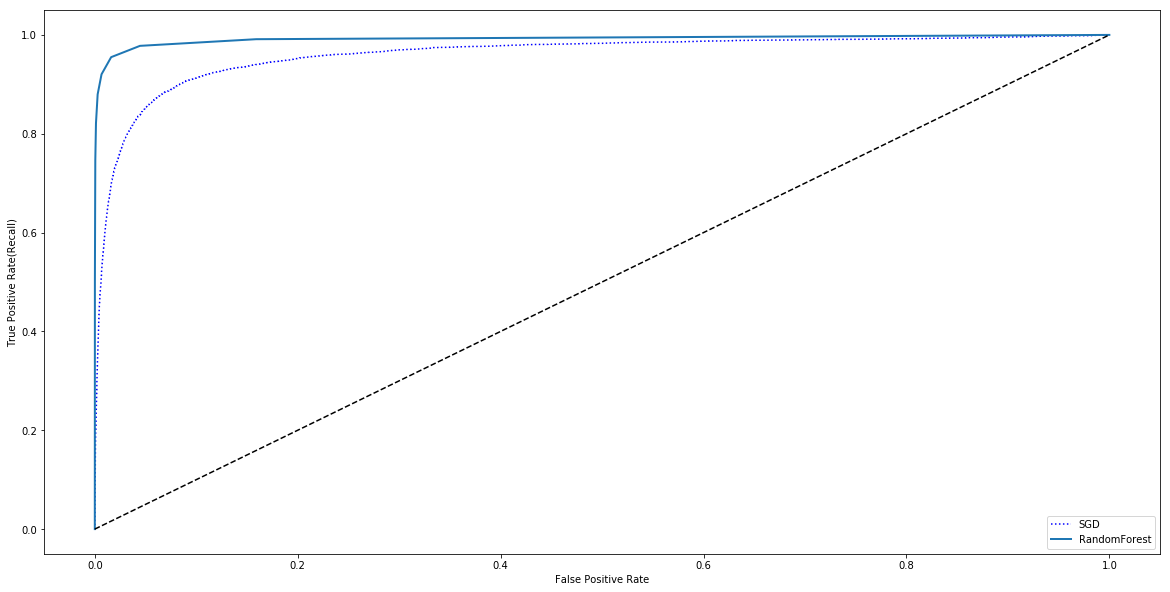

In [0]:
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'RandomForest')
plt.legend()
plt.show()

In [0]:
roc_auc_score(Y_train_5,Y_proba_forest[:,1])

0.9920527492698306

In [0]:
precisions_forest,recalls_forest,thresholds_forest= precision_recall_curve(Y_train_5,Y_proba_forest[:,1])
thresholds_forest=thresholds_forest

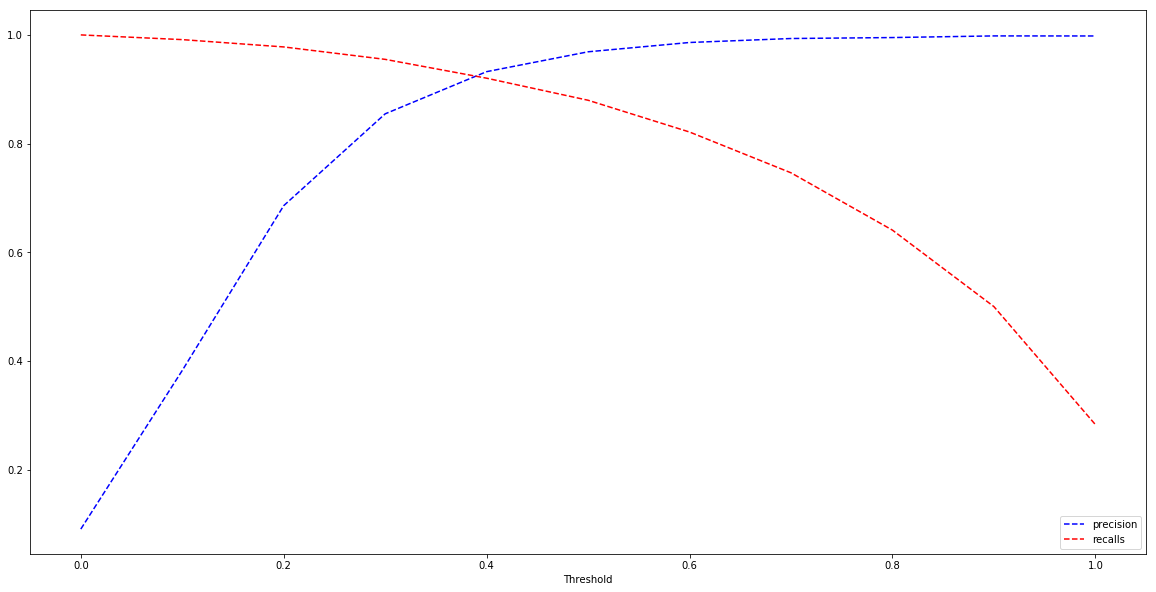

In [0]:
precision_recall_vs_threshold(precisions_forest,recalls_forest,thresholds_forest)

In [0]:
precisions_forest

array([0.09035   , 0.38232783, 0.68568102, 0.85471355, 0.93234909,
       0.96891508, 0.98604651, 0.99336935, 0.99512894, 0.99815838,
       0.99804688, 1.        ])

In [0]:
print(precision_score(Y_train_5,Y_proba_forest[:,1]>=thresholds_forest[np.argmax(precisions_forest>=0.99)]))
print(recall_score(Y_train_5,Y_proba_forest[:,1]>=thresholds_forest[np.argmax(precisions_forest>=0.99)]))

0.9933693516699411
0.7461722929348829


Support Vector Machine classifiers or Linear classifiers -> Binary classifiers

Random Forest classifiers or naive Bayes classifiers -> Multiclass classifiers